In [10]:
import os
import argparse
import time
import numpy as np
from numpy import genfromtxt, savetxt
from sklearn.neighbors import KernelDensity


import torch
import torch.nn as nn
import torch.optim as optim
from numpy import genfromtxt

import cantera as ct
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
from scipy import integrate 

from torchdiffeq import odeint_adjoint as odeint
device = 'cpu'

plt.rcParams.update({'font.size': 14})
plt.rcParams['lines.linewidth'] = 3

%matplotlib inline

# Change in Rel Tol

In [11]:
plots ='plots'
solution = 'solution_data'

work_dir = os.getcwd()



In [12]:

# # === CONFIGURATION ===
# INPUT_DIR = "solution_data"
# OUTPUT_DIR_RANDOM = "sampled_random_50"
# OUTPUT_DIR_KDE = "sampled_multiscale_50"
# SOL_NUM_POINTS = 50
# TEMP_COL = -1       # Last column (T)
# TARGET_COL = 3      # Sampling target column (e.g., Y_OH)
# TAU_R = 1e-2        # Total simulation time
# N_STEPS = 10000     # Number of simulation steps originally used

# species_list = ["Y_H2", "Y_H", "Y_O2", "Y_OH", "Y_O", "Y_H2O", "Y_HO2", "Y_H2O2", "Y_N2", "T"]

# # === UTILITIES ===
# def estimate_ignition_delay(data, time, temp_col):
#     dTdt = np.gradient(data[:, temp_col], time)
#     return time[np.argmax(dTdt)]

# def trim_to_4tau(data, time, tau_ign):
#     mask = time <= 5 * tau_ign
#     return data[mask], time[mask]

# def kde_sample(data, target_col, num_points=50, bandwidth=0.01):
#     target = data[:, target_col].reshape(-1, 1)
#     kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(target)
#     probs = np.exp(kde.score_samples(target))
#     weights = np.min(probs) / probs
#     weights /= weights.sum()
#     indices = np.random.choice(len(data), size=num_points, replace=False, p=weights)
#     # Ensure index 0 is included
#     if 0 not in indices:
#         indices[0] = 0
#     return np.sort(indices)

# def random_sample(data, num_points=50):
#     indices = np.random.choice(len(data), size=num_points, replace=False)
#     # if indices[0]!=0:
#     #     indices[0]=0
#     return np.sort(indices)

# def plot_sampling(file, time, full_vals, rand_idx, kde_idx):
#     plt.figure(figsize=(8, 5))
#     fig_name = "sampled_multiscale/Species mass fraction_ " + file+'.png'
#     plt.plot(time, full_vals, label='Full Data (10,000)', alpha=0.6, color='gray')
#     plt.scatter(time[rand_idx], full_vals[rand_idx], label='Random Sample', color='red', s=25)
#     plt.scatter(time[kde_idx], full_vals[kde_idx], label='KDE (Multi-Scale)', color='blue', s=25)
#     plt.xlabel("Time [s]")
#     plt.ylabel(f"Mass Fraction (species_list {TARGET_COL})")
#     plt.title(f"Sampling Comparison: {file}")
#     plt.xscale('log')
#     plt.yscale('log')
#     plt.legend()
#     plt.grid(True)
#     plt.tight_layout()
#     plt.savefig(fig_name,dpi=300)
#     plt.show()


# # === MAIN PROCESS ===
# def process_file(file):
#     full_path = os.path.join(INPUT_DIR, file)
#     data = genfromtxt(full_path, delimiter=',')
#     time = np.linspace(0, TAU_R, data.shape[0])

#     try:
#         tau_ign = estimate_ignition_delay(data, time, TEMP_COL)
#     except:
#         print(f"[!] Could not estimate ignition delay for {file}")
#         return

#     data_trimmed, time_trimmed = trim_to_4tau(data, time, tau_ign)
#     # data_trimmed, time_trimmed = data, time

#     if len(data_trimmed) < SOL_NUM_POINTS:
#         print(f"[!]  {file}: too few points after trim.")
#         data_trimmed, time_trimmed = data, time
#         # return

#     rand_idx = random_sample(data_trimmed, SOL_NUM_POINTS)
#     kde_idx = kde_sample(data_trimmed, TARGET_COL, SOL_NUM_POINTS)
    
#     # save_rand = [time[rand_idx], data_trimmed[rand_idx]]
#     # save_kde = [time[kde_idx], data_trimmed[kde_idx]]
    
#     # Concatenate vertically and transpose so each row is [time, data]
#     save_rand = np.column_stack((time[rand_idx], data_trimmed[rand_idx]))
#     save_kde = np.column_stack((time[kde_idx], data_trimmed[kde_idx]))  
    
#     savetxt(os.path.join(OUTPUT_DIR_RANDOM, file), save_rand, delimiter=',')
#     savetxt(os.path.join(OUTPUT_DIR_KDE, file), save_kde, delimiter=',')

#     print(f"[✓] Processed {file}: saved random and KDE samples.")

#     # Plot comparison
#     plot_sampling(file, time_trimmed, data_trimmed[:, TARGET_COL], rand_idx, kde_idx)

# # === RUN SCRIPT ===
# def main():
#     os.makedirs(OUTPUT_DIR_RANDOM, exist_ok=True)
#     os.makedirs(OUTPUT_DIR_KDE, exist_ok=True)

#     for fname in os.listdir(INPUT_DIR):
#         if fname.endswith(".csv"):
#             process_file(fname)

# if __name__ == "__main__":
#     main()


[✓] Processed const_P_solution_phi_0.1_T0_1000.csv: saved random and KDE samples.


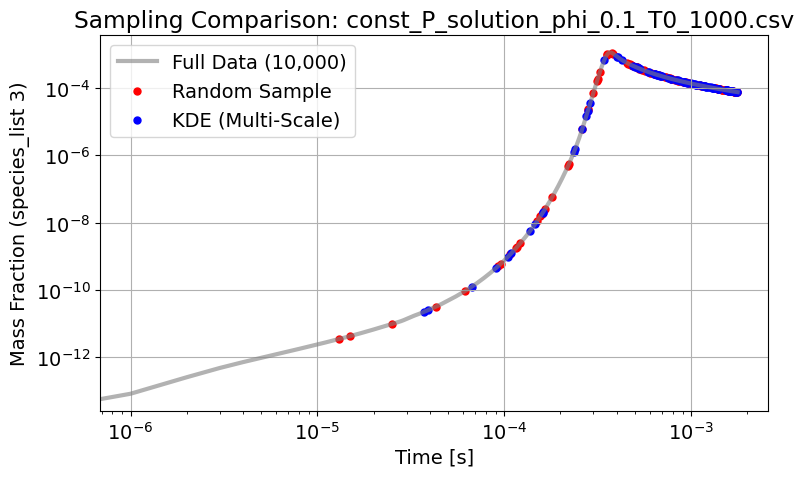

[✓] Processed const_P_solution_phi_0.1_T0_1050.csv: saved random and KDE samples.


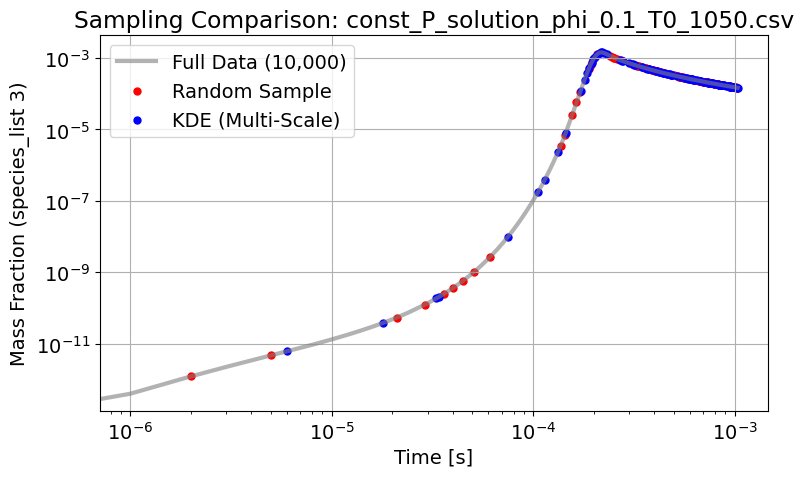

[✓] Processed const_P_solution_phi_0.1_T0_1100.csv: saved random and KDE samples.


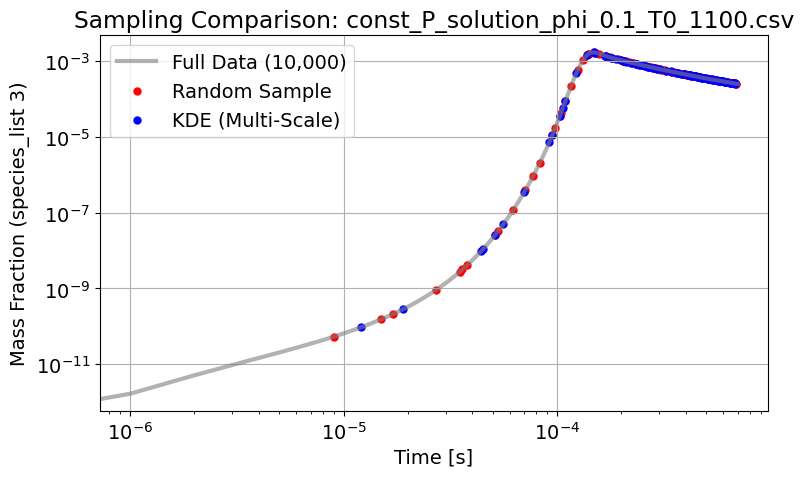

[✓] Processed const_P_solution_phi_0.1_T0_1150.csv: saved random and KDE samples.


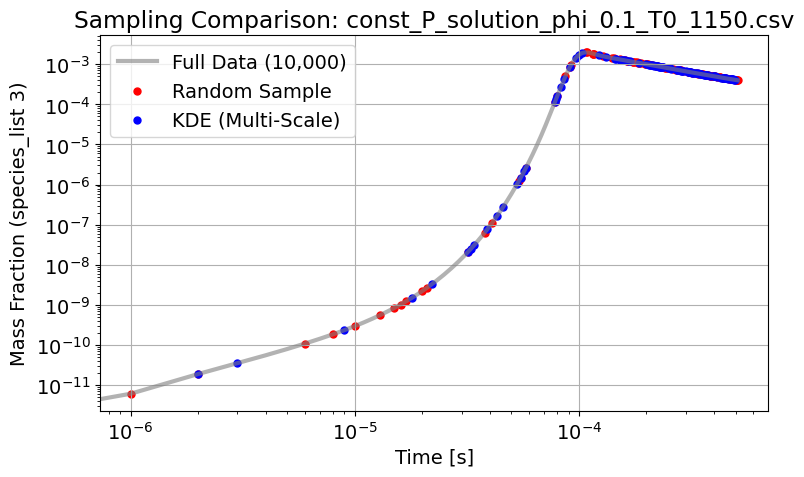

[✓] Processed const_P_solution_phi_0.1_T0_1200.csv: saved random and KDE samples.


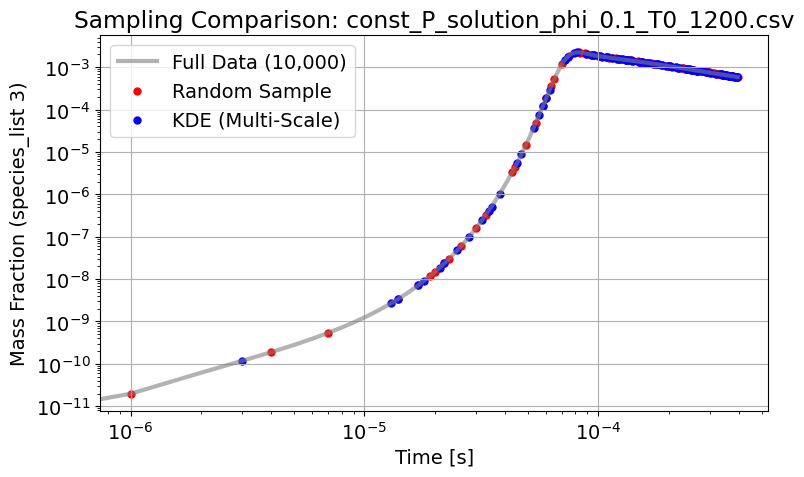

[✓] Processed const_P_solution_phi_0.1_T0_950.csv: saved random and KDE samples.


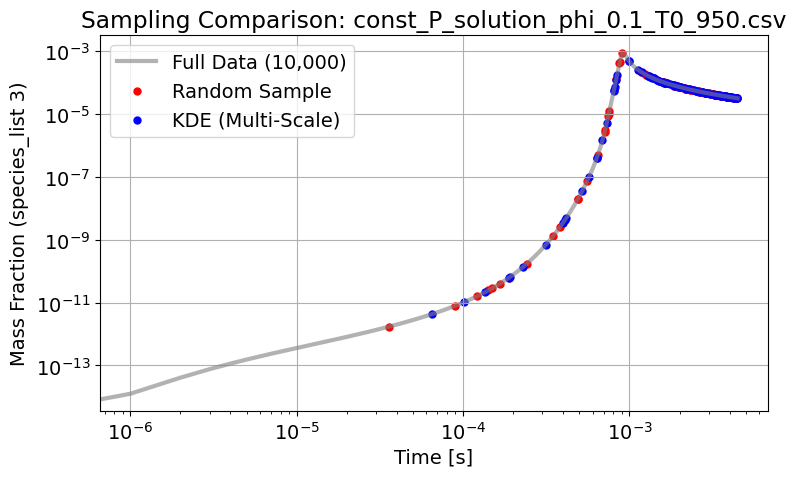

[✓] Processed const_P_solution_phi_0.25_T0_1000.csv: saved random and KDE samples.


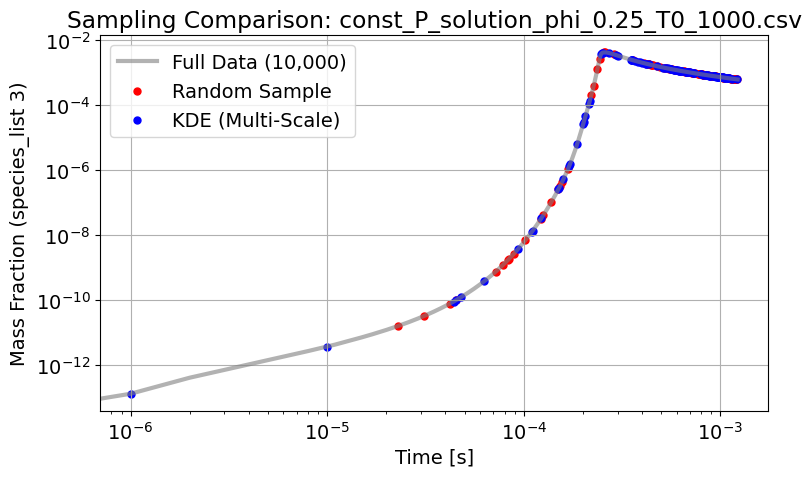

[✓] Processed const_P_solution_phi_0.25_T0_1050.csv: saved random and KDE samples.


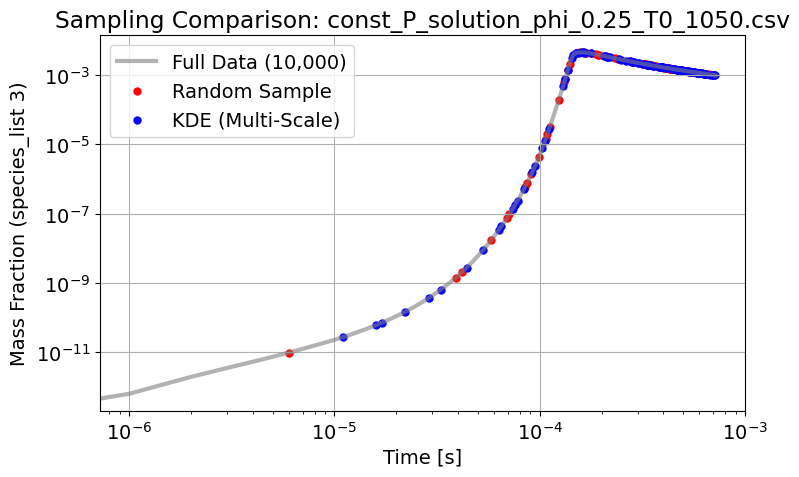

[✓] Processed const_P_solution_phi_0.25_T0_1100.csv: saved random and KDE samples.


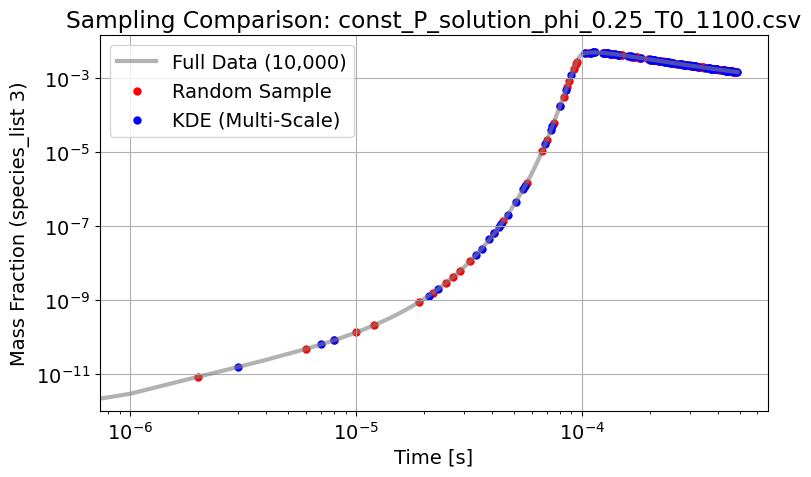

[✓] Processed const_P_solution_phi_0.25_T0_1150.csv: saved random and KDE samples.


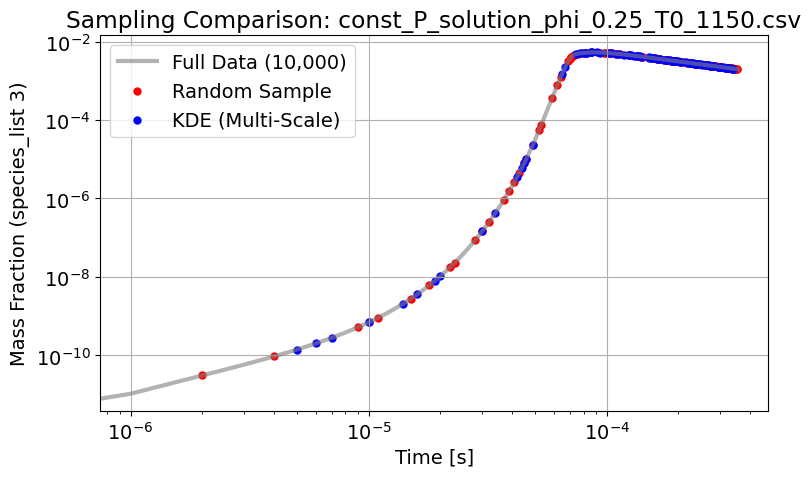

[✓] Processed const_P_solution_phi_0.25_T0_1200.csv: saved random and KDE samples.


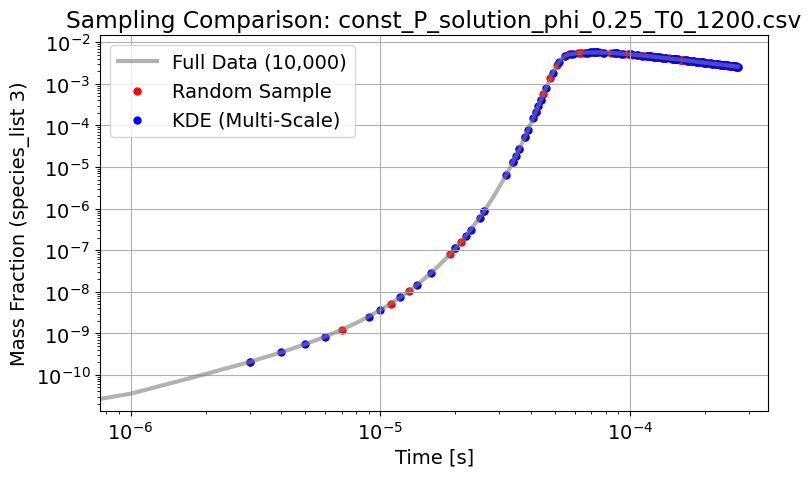

[✓] Processed const_P_solution_phi_0.25_T0_950.csv: saved random and KDE samples.


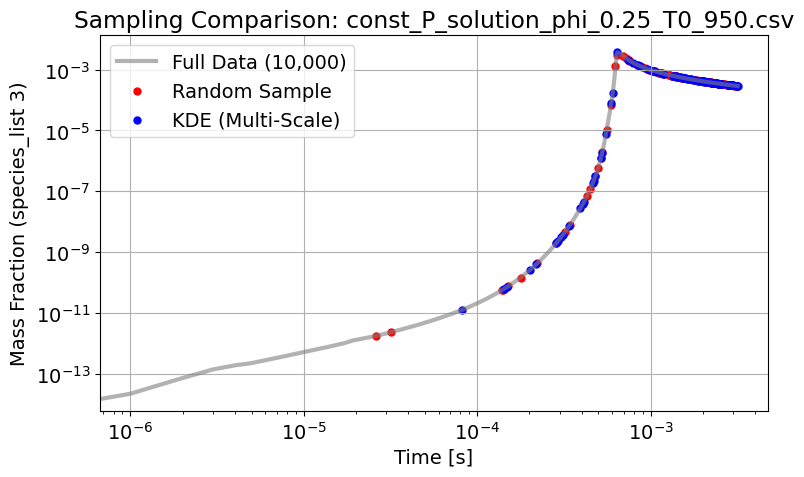

[✓] Processed const_P_solution_phi_0.5_T0_1000.csv: saved random and KDE samples.


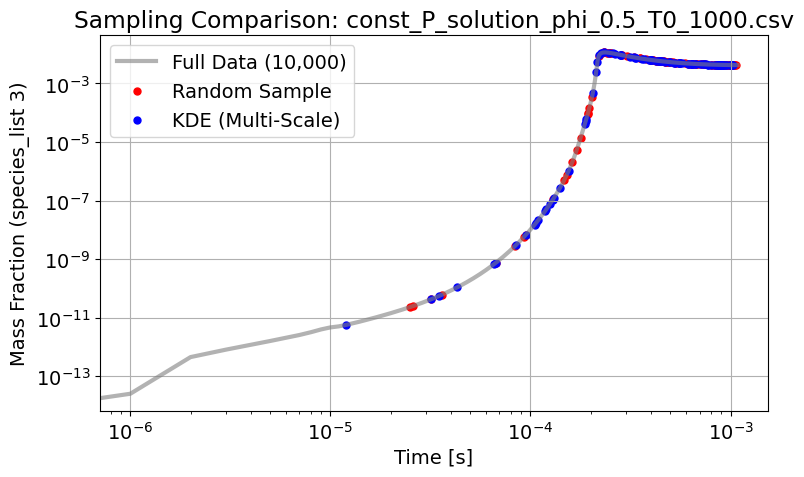

[✓] Processed const_P_solution_phi_0.5_T0_1050.csv: saved random and KDE samples.


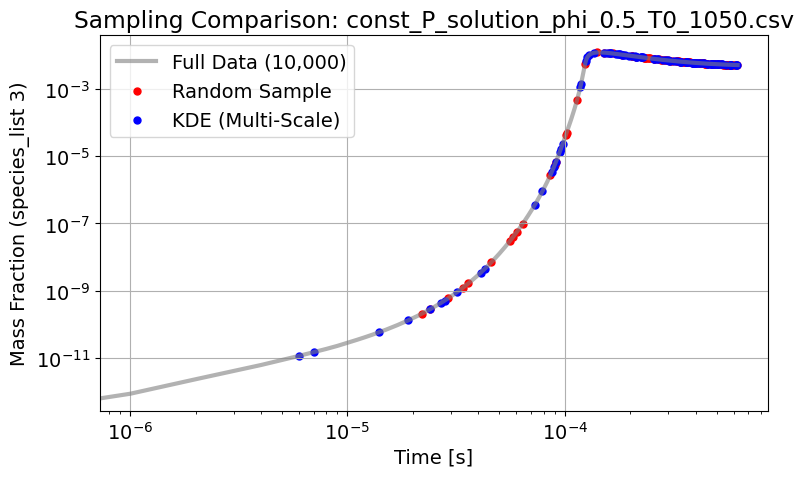

[✓] Processed const_P_solution_phi_0.5_T0_1100.csv: saved random and KDE samples.


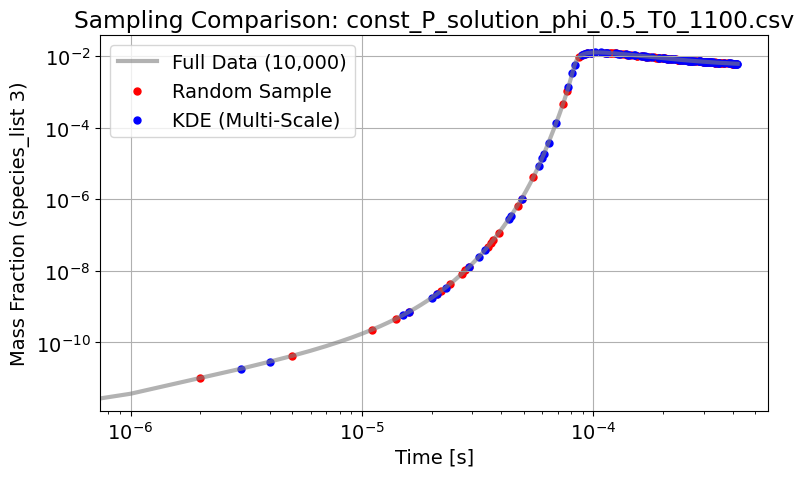

[✓] Processed const_P_solution_phi_0.5_T0_1150.csv: saved random and KDE samples.


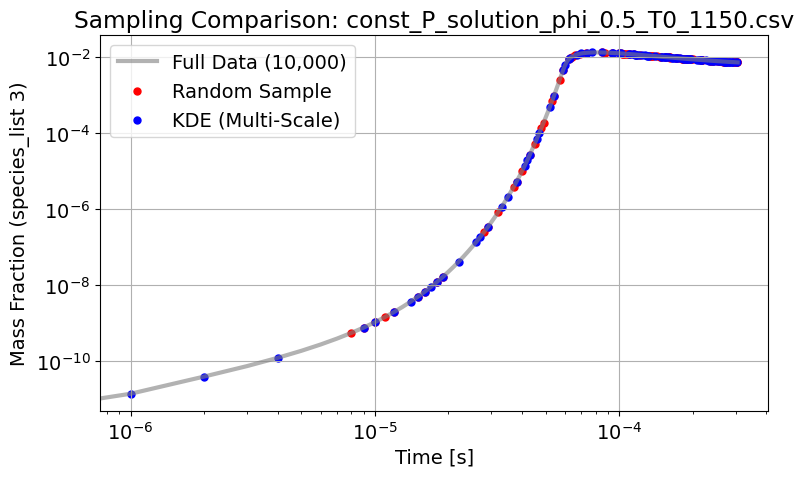

[✓] Processed const_P_solution_phi_0.5_T0_1200.csv: saved random and KDE samples.


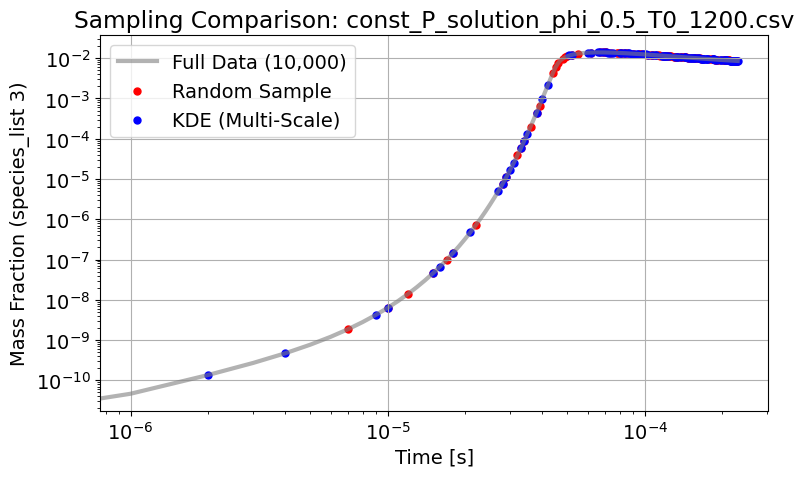

[✓] Processed const_P_solution_phi_0.5_T0_950.csv: saved random and KDE samples.


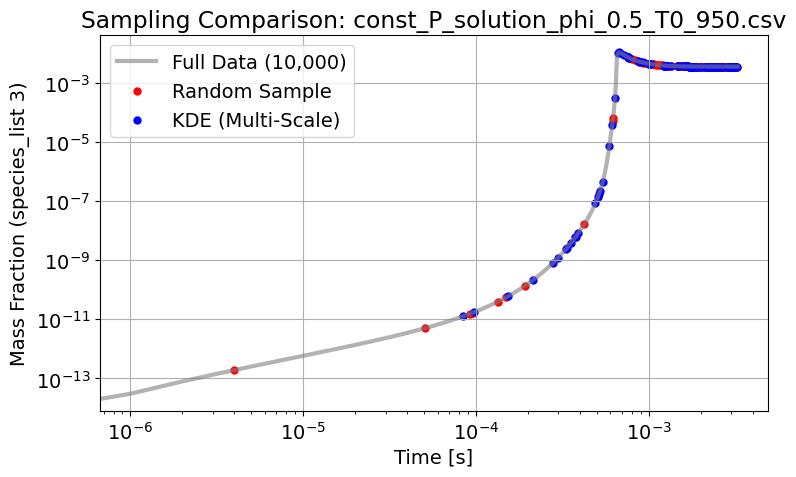

[✓] Processed const_P_solution_phi_0.75_T0_1000.csv: saved random and KDE samples.


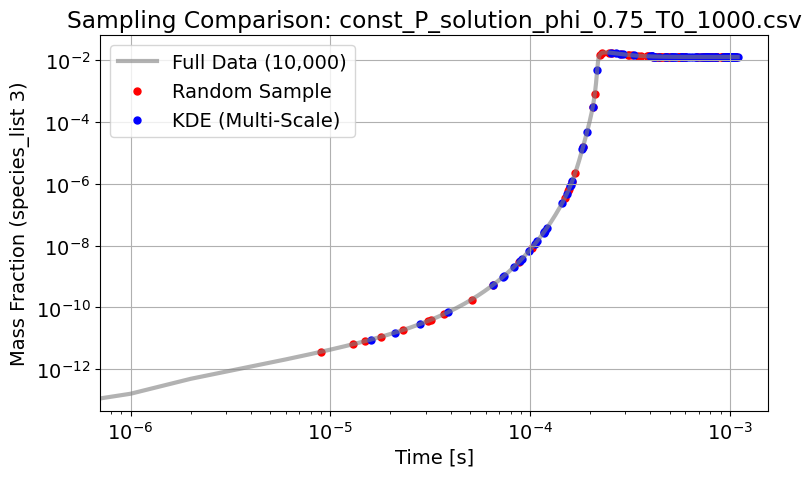

[✓] Processed const_P_solution_phi_0.75_T0_1050.csv: saved random and KDE samples.


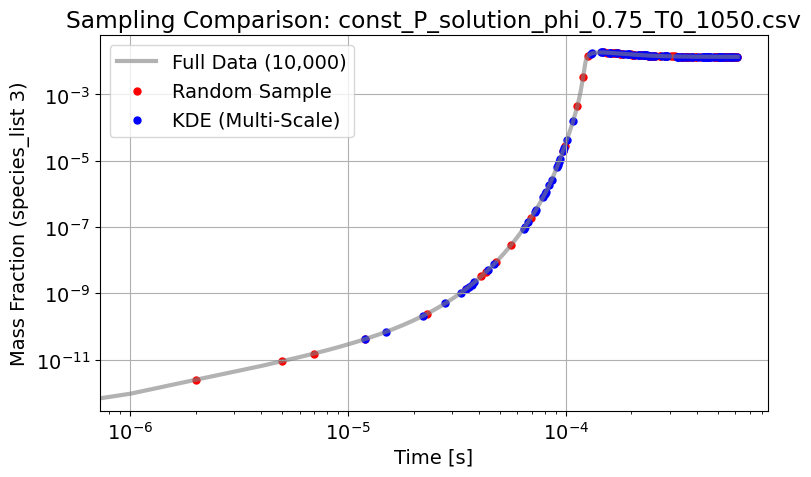

[✓] Processed const_P_solution_phi_0.75_T0_1100.csv: saved random and KDE samples.


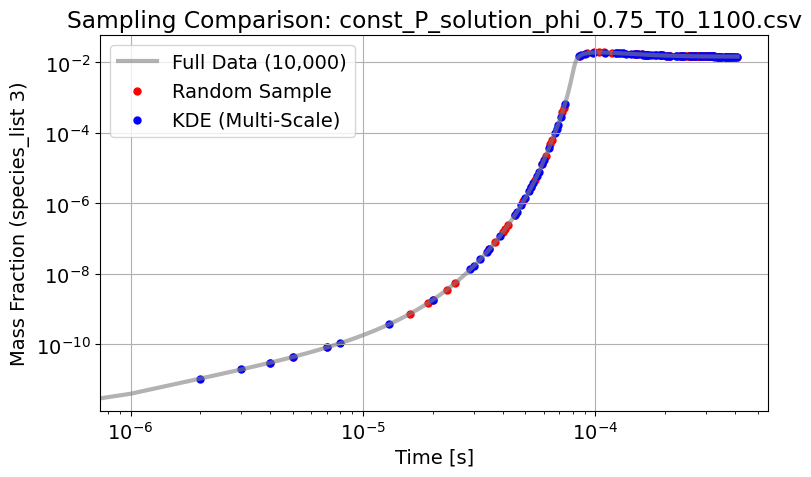

[✓] Processed const_P_solution_phi_0.75_T0_1150.csv: saved random and KDE samples.


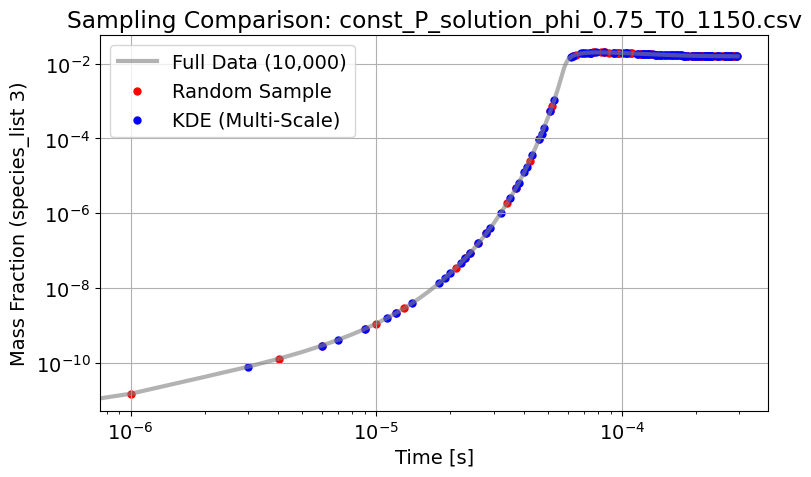

[✓] Processed const_P_solution_phi_0.75_T0_1200.csv: saved random and KDE samples.


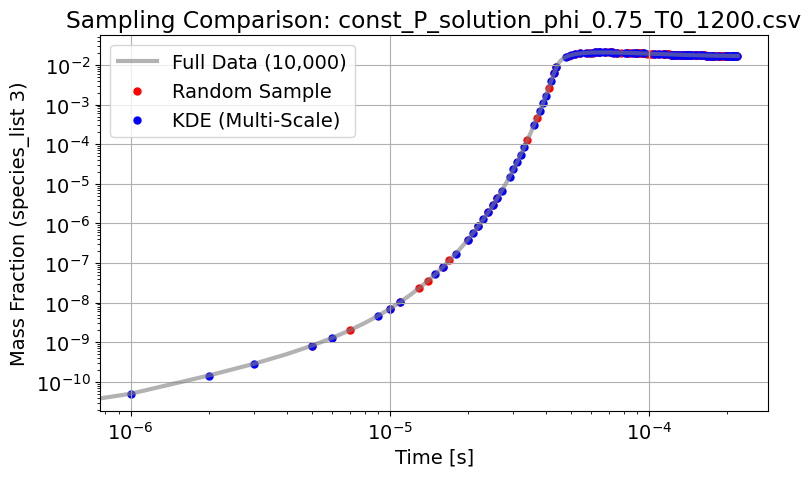

[✓] Processed const_P_solution_phi_0.75_T0_950.csv: saved random and KDE samples.


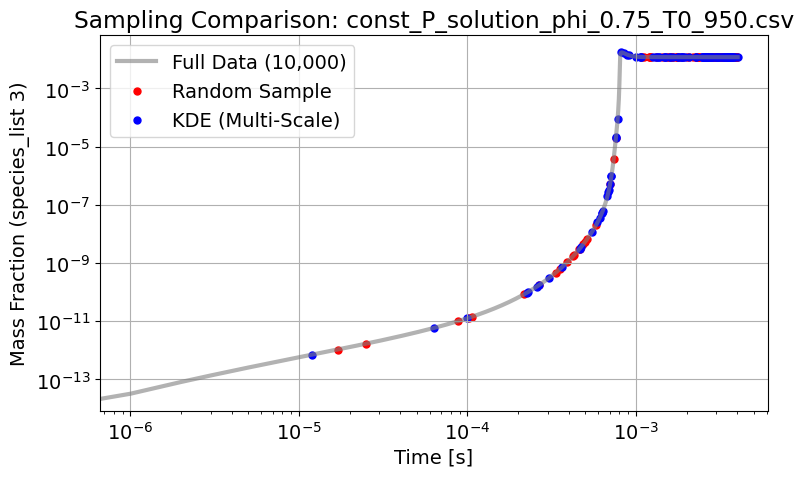

[✓] Processed const_P_solution_phi_0.9_T0_1000.csv: saved random and KDE samples.


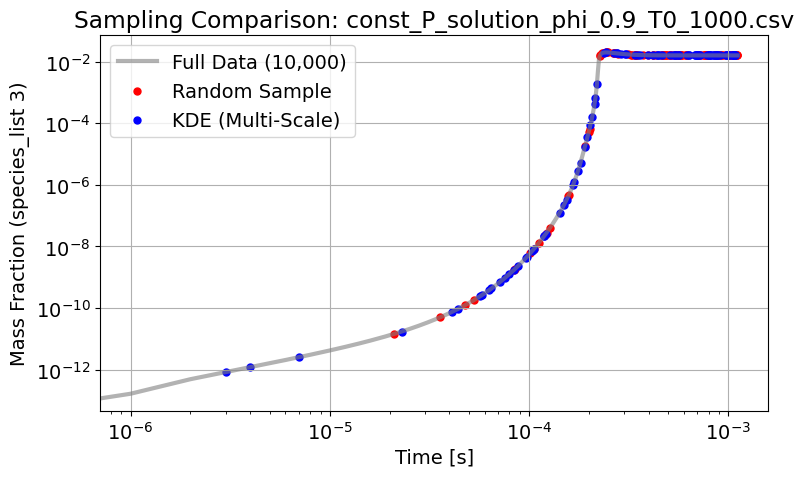

[✓] Processed const_P_solution_phi_0.9_T0_1050.csv: saved random and KDE samples.


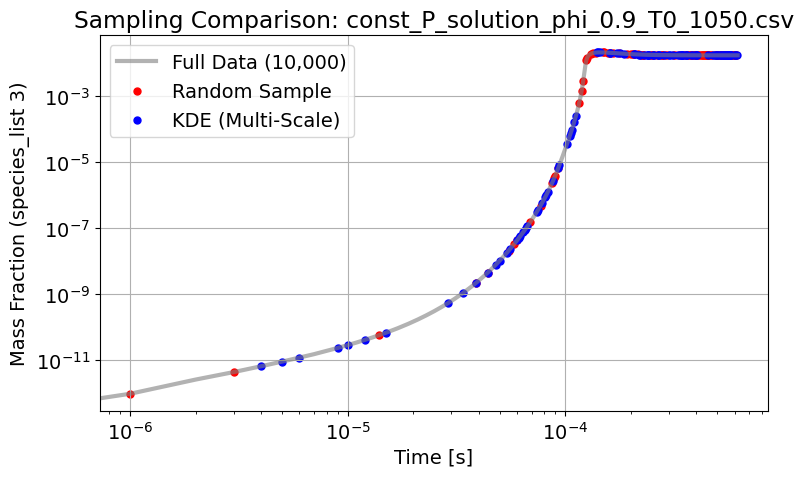

[✓] Processed const_P_solution_phi_0.9_T0_1100.csv: saved random and KDE samples.


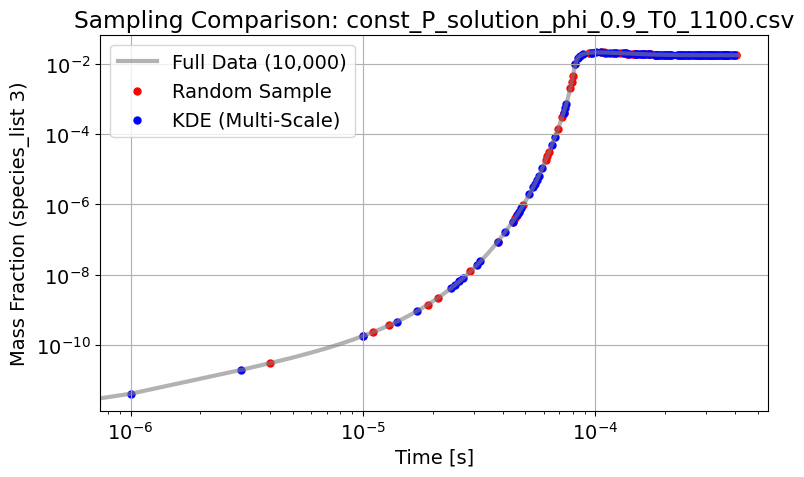

[✓] Processed const_P_solution_phi_0.9_T0_1150.csv: saved random and KDE samples.


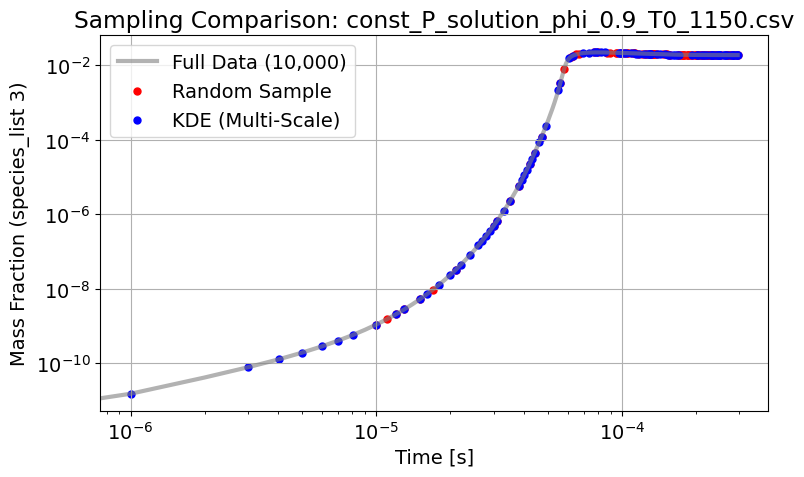

[✓] Processed const_P_solution_phi_0.9_T0_1200.csv: saved random and KDE samples.


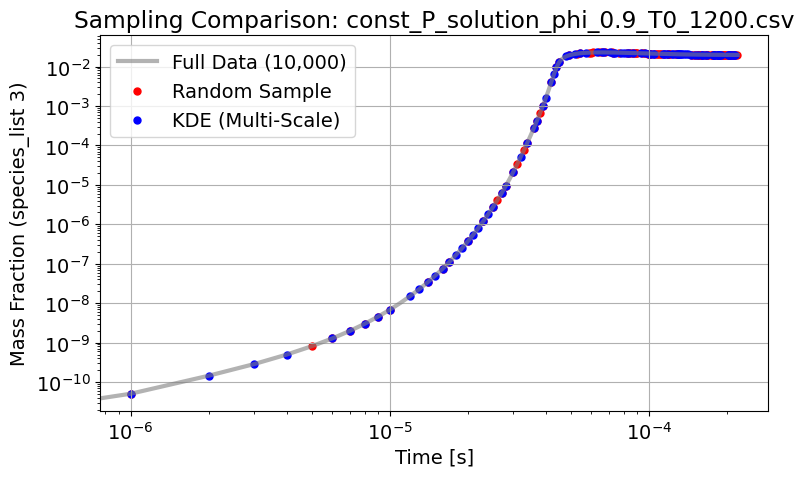

[✓] Processed const_P_solution_phi_0.9_T0_950.csv: saved random and KDE samples.


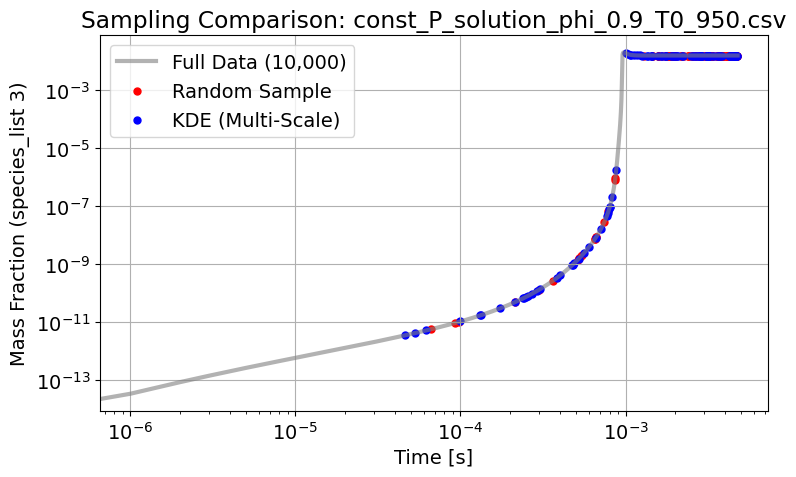

[✓] Processed const_P_solution_phi_1.0_T0_1000.csv: saved random and KDE samples.


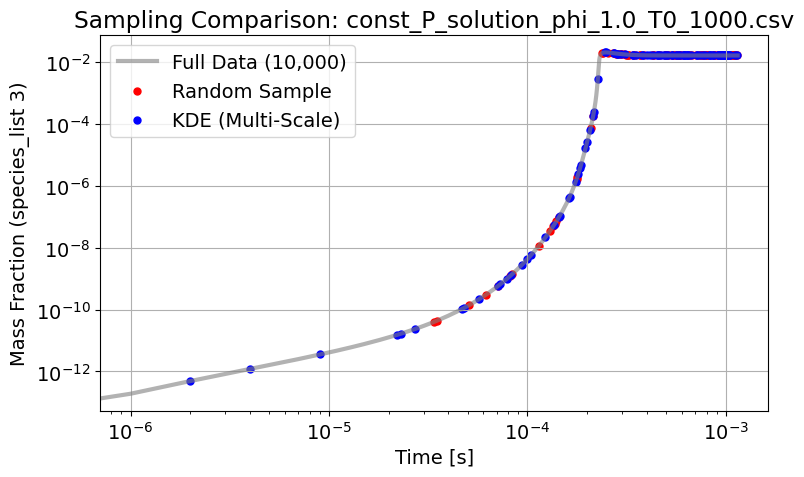

[✓] Processed const_P_solution_phi_1.0_T0_1050.csv: saved random and KDE samples.


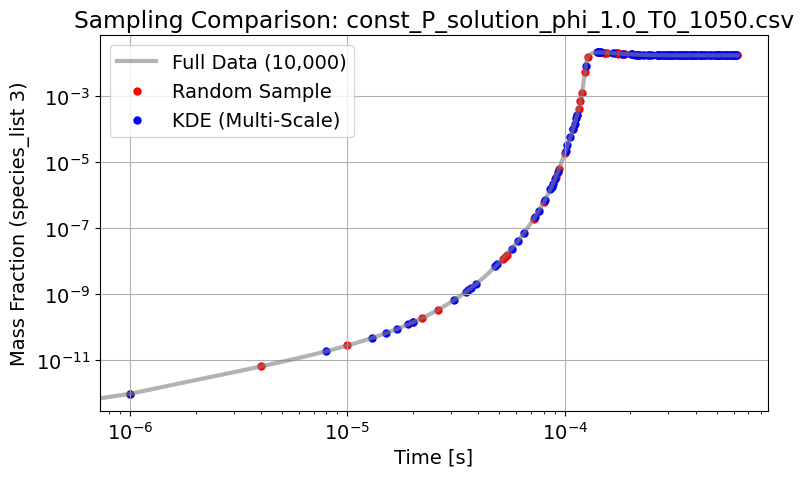

[✓] Processed const_P_solution_phi_1.0_T0_1100.csv: saved random and KDE samples.


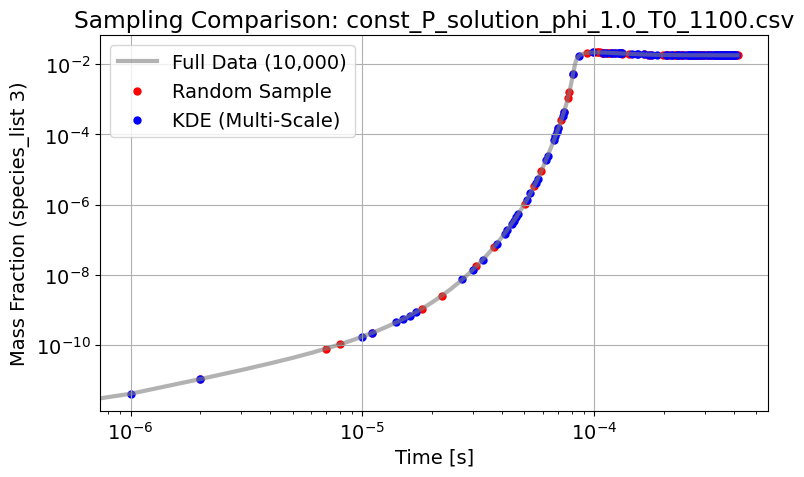

[✓] Processed const_P_solution_phi_1.0_T0_1150.csv: saved random and KDE samples.


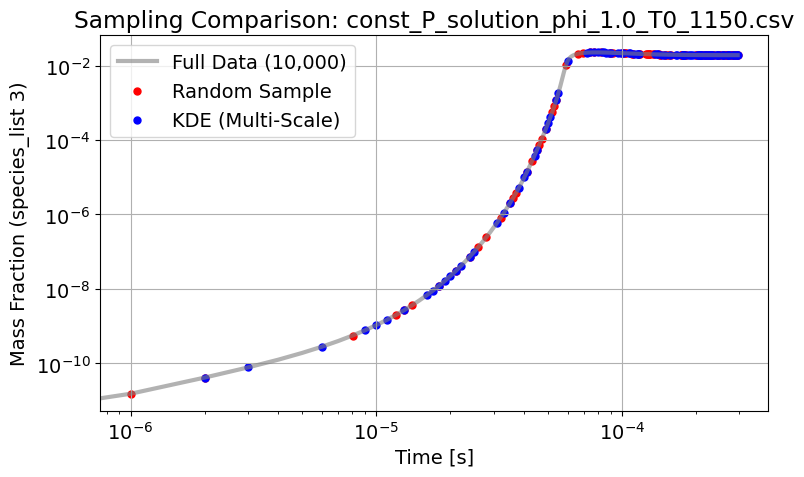

[✓] Processed const_P_solution_phi_1.0_T0_1200.csv: saved random and KDE samples.


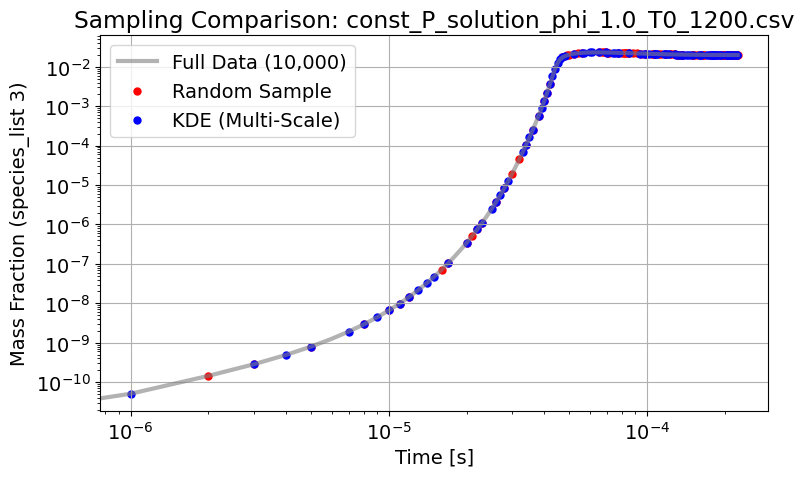

[✓] Processed const_P_solution_phi_1.0_T0_950.csv: saved random and KDE samples.


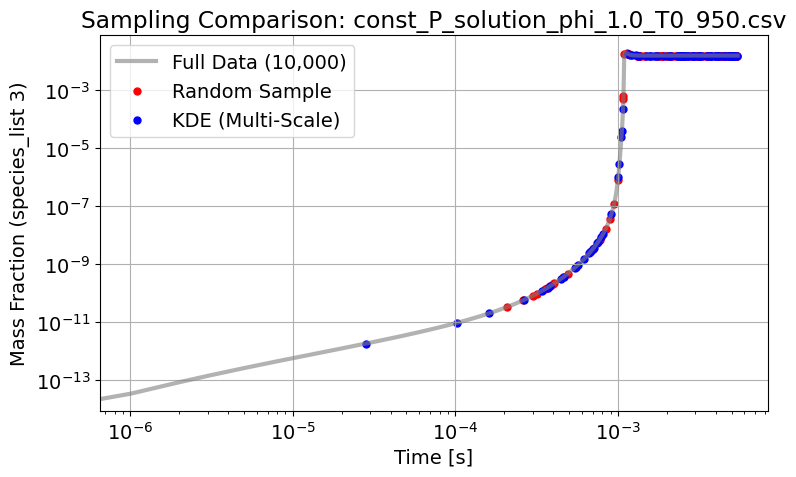

[✓] Processed const_P_solution_phi_1.1_T0_1000.csv: saved random and KDE samples.


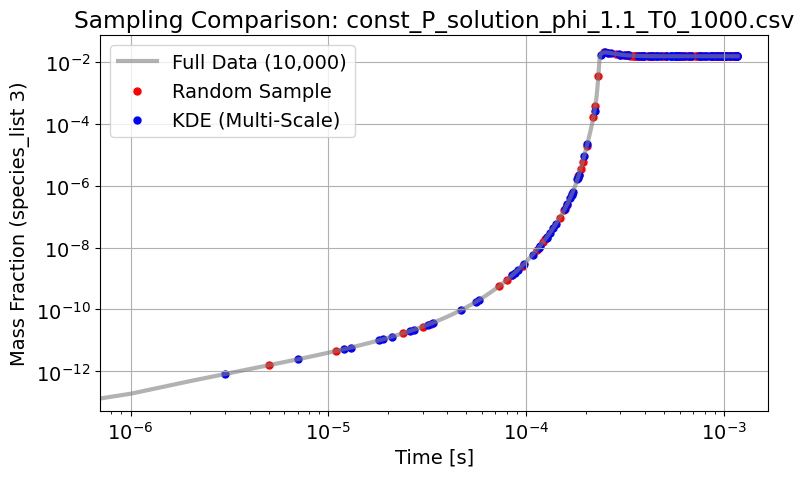

[✓] Processed const_P_solution_phi_1.1_T0_1050.csv: saved random and KDE samples.


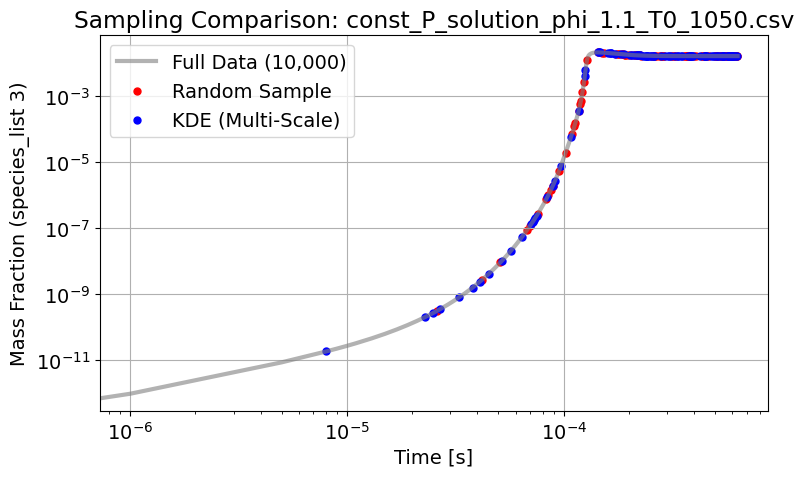

[✓] Processed const_P_solution_phi_1.1_T0_1100.csv: saved random and KDE samples.


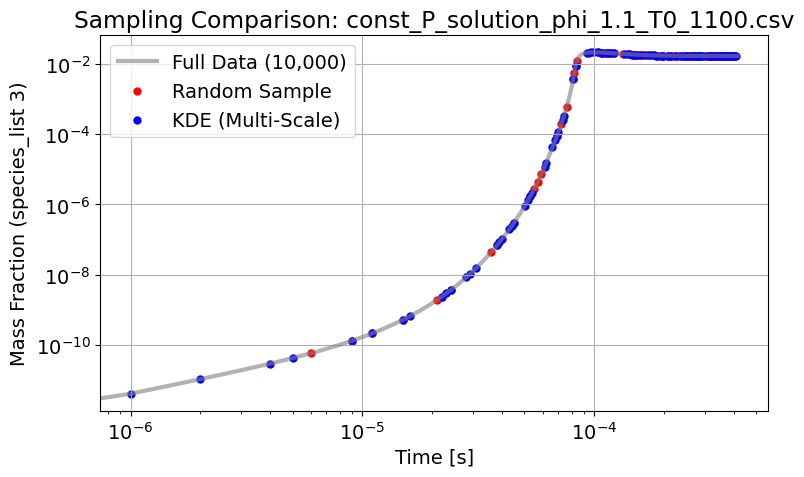

[✓] Processed const_P_solution_phi_1.1_T0_1150.csv: saved random and KDE samples.


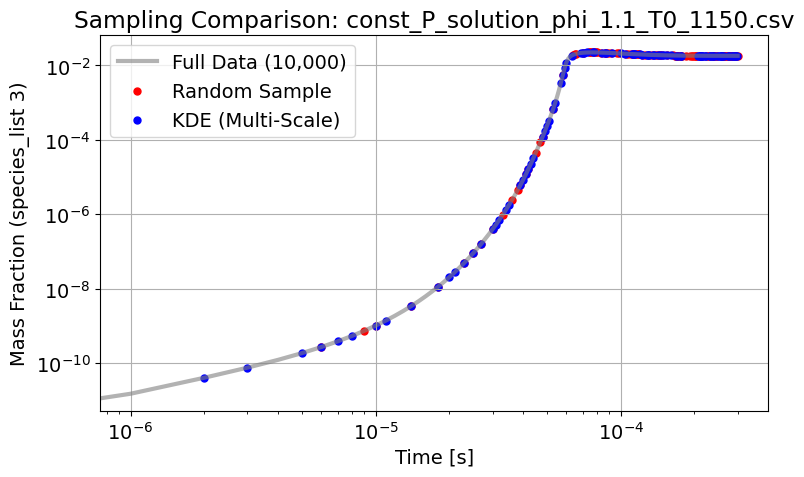

[✓] Processed const_P_solution_phi_1.1_T0_1200.csv: saved random and KDE samples.


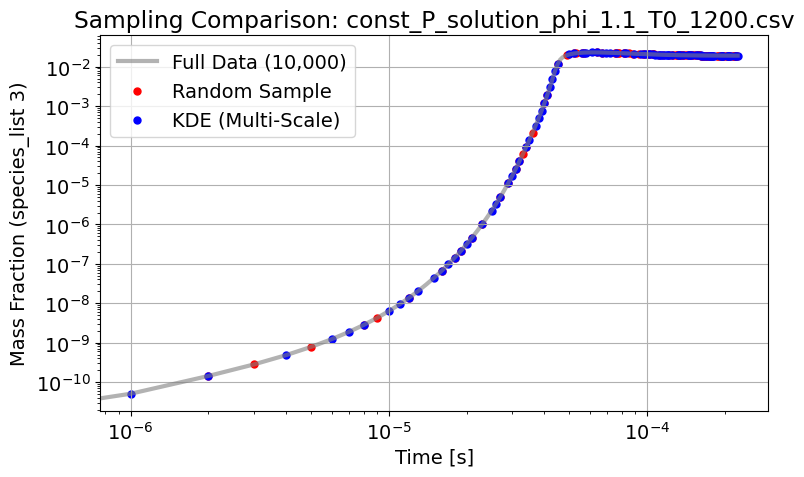

[✓] Processed const_P_solution_phi_1.1_T0_950.csv: saved random and KDE samples.


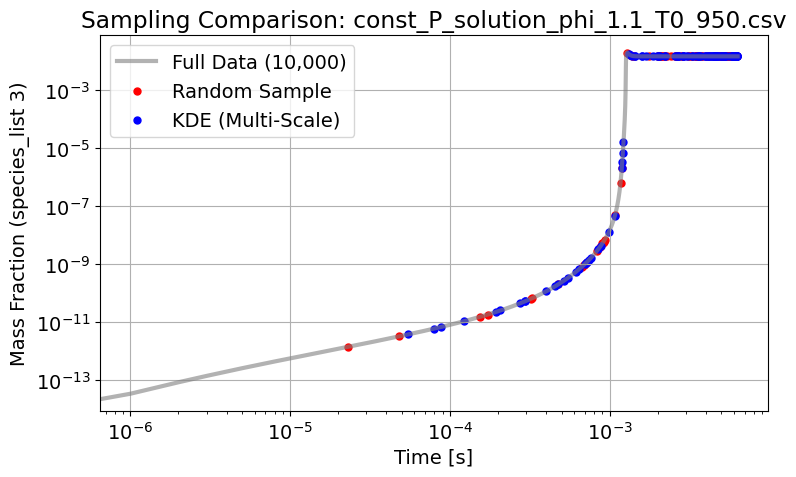

[✓] Processed const_P_solution_phi_1.25_T0_1000.csv: saved random and KDE samples.


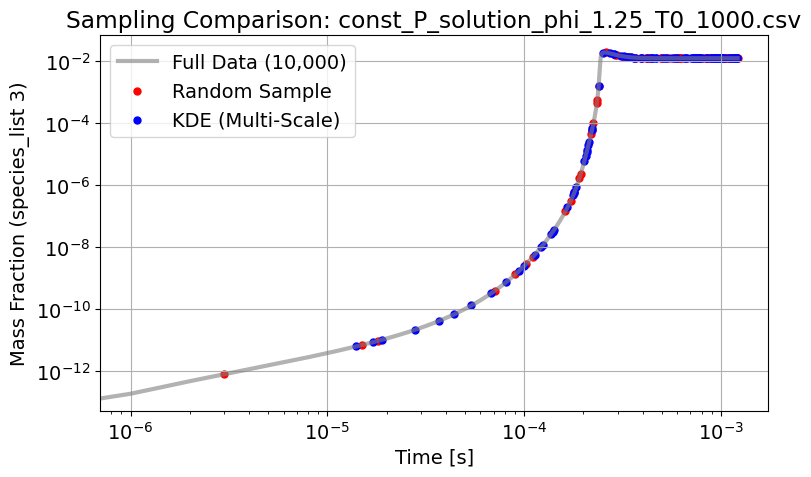

[✓] Processed const_P_solution_phi_1.25_T0_1050.csv: saved random and KDE samples.


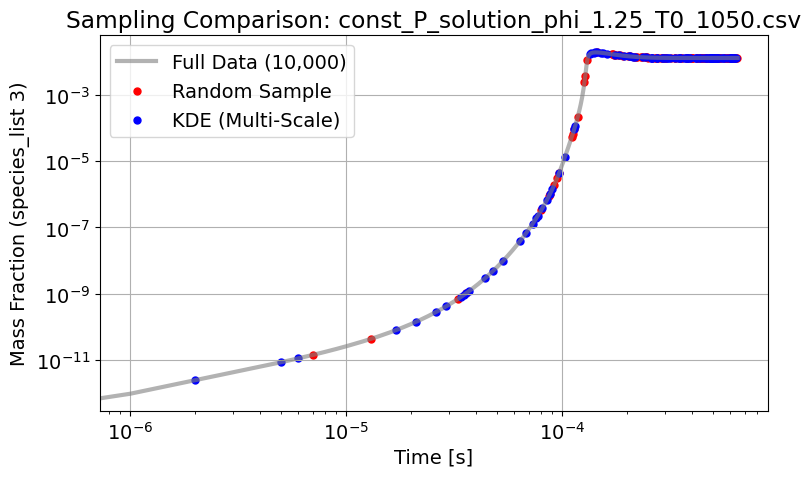

[✓] Processed const_P_solution_phi_1.25_T0_1100.csv: saved random and KDE samples.


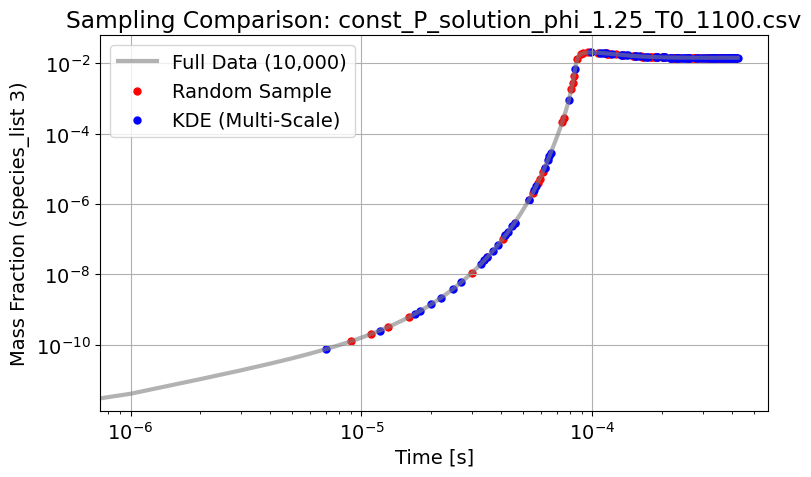

[✓] Processed const_P_solution_phi_1.25_T0_1150.csv: saved random and KDE samples.


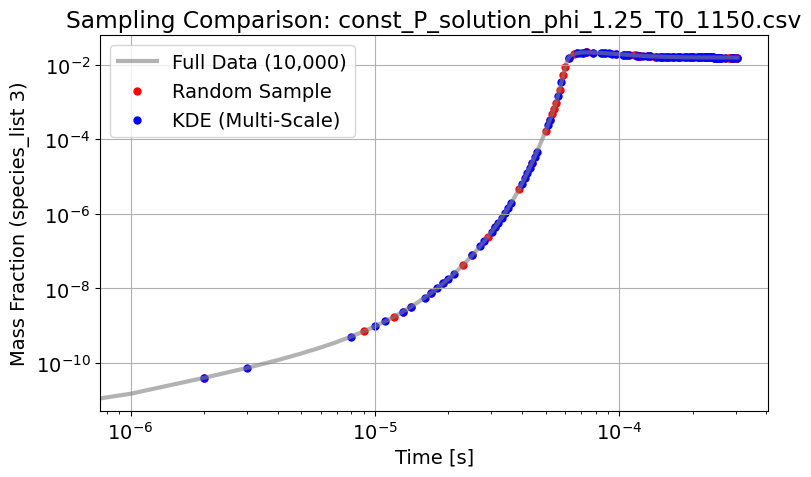

[✓] Processed const_P_solution_phi_1.25_T0_1200.csv: saved random and KDE samples.


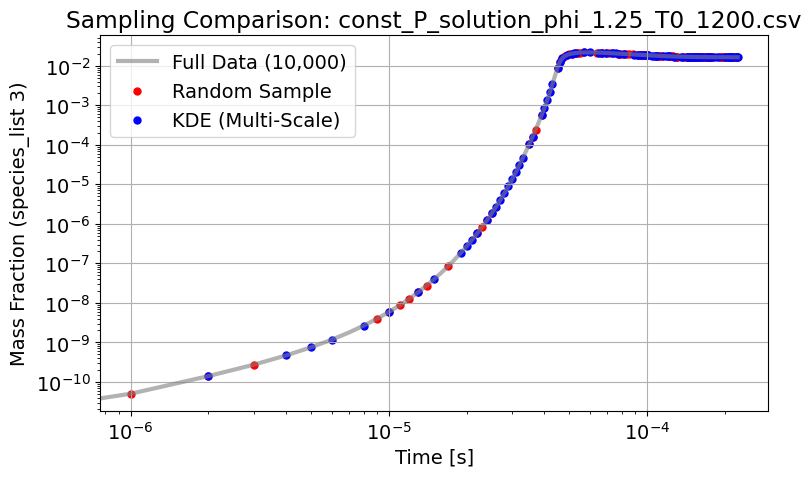

[✓] Processed const_P_solution_phi_1.25_T0_950.csv: saved random and KDE samples.


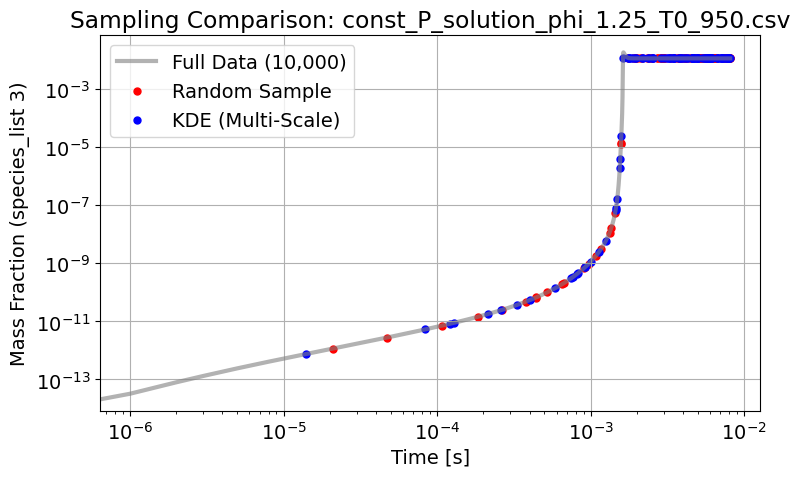

[✓] Processed const_P_solution_phi_1.5_T0_1000.csv: saved random and KDE samples.


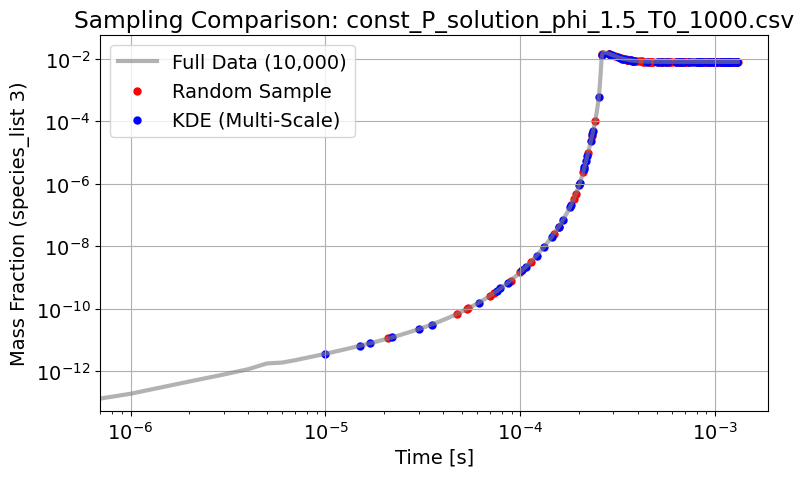

[✓] Processed const_P_solution_phi_1.5_T0_1050.csv: saved random and KDE samples.


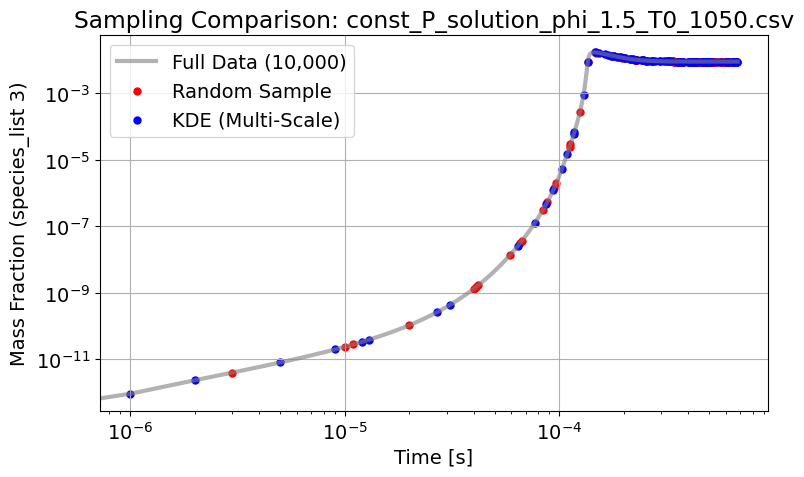

[✓] Processed const_P_solution_phi_1.5_T0_1100.csv: saved random and KDE samples.


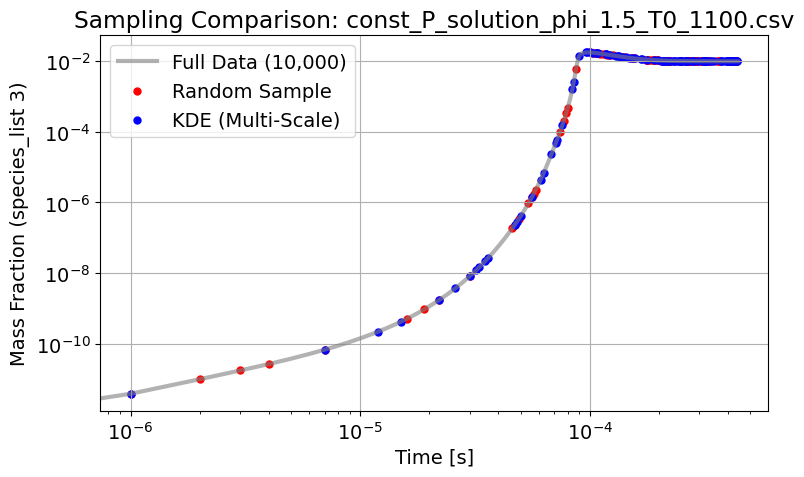

[✓] Processed const_P_solution_phi_1.5_T0_1150.csv: saved random and KDE samples.


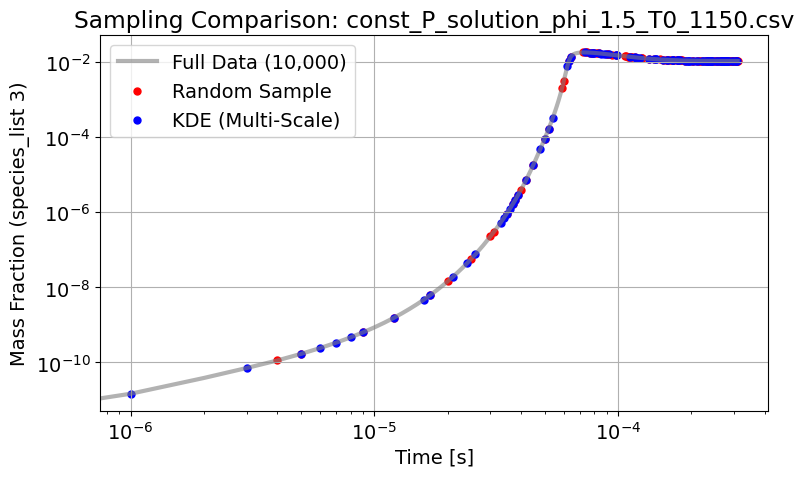

[✓] Processed const_P_solution_phi_1.5_T0_1200.csv: saved random and KDE samples.


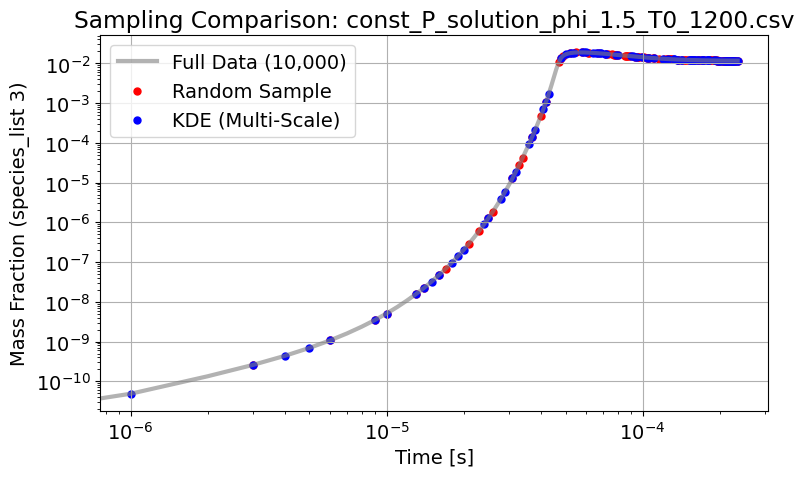

[✓] Processed const_P_solution_phi_1.5_T0_950.csv: saved random and KDE samples.


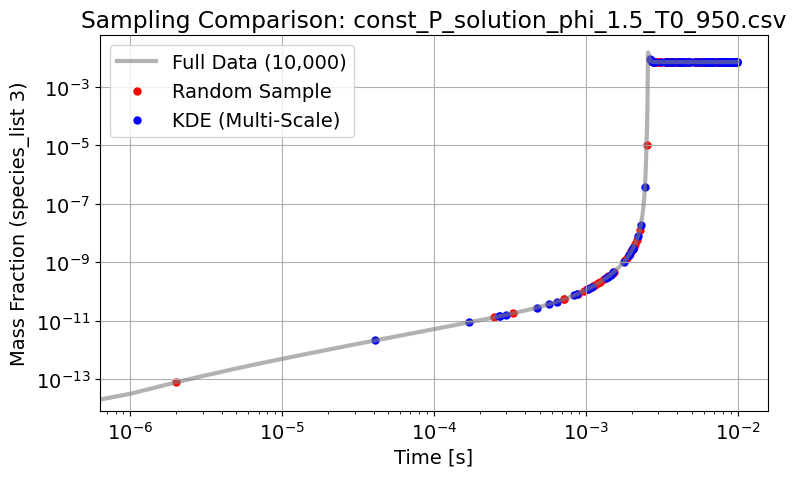

[✓] Processed const_P_solution_phi_2.0_T0_1000.csv: saved random and KDE samples.


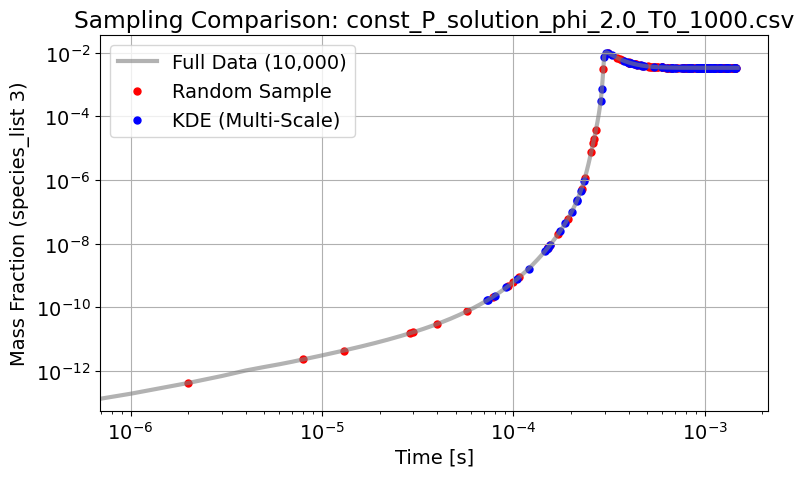

[✓] Processed const_P_solution_phi_2.0_T0_1050.csv: saved random and KDE samples.


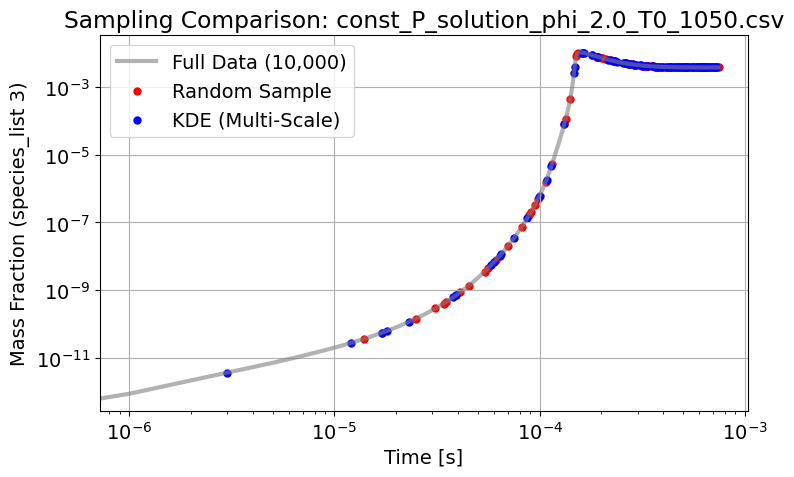

[✓] Processed const_P_solution_phi_2.0_T0_1100.csv: saved random and KDE samples.


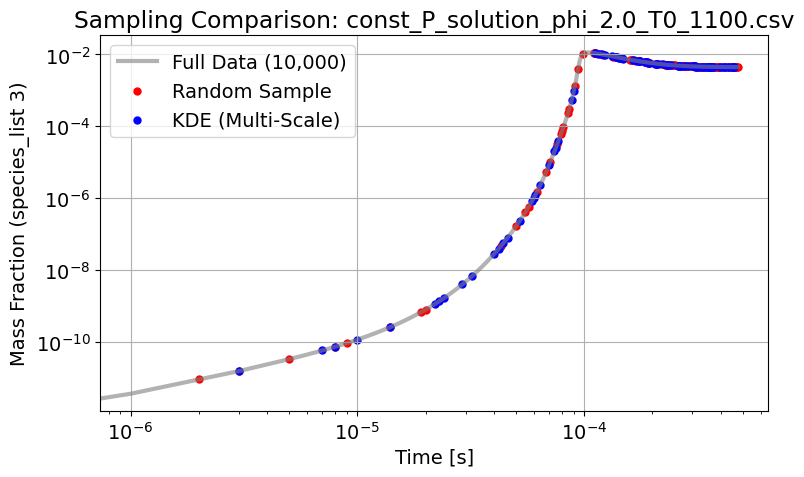

[✓] Processed const_P_solution_phi_2.0_T0_1150.csv: saved random and KDE samples.


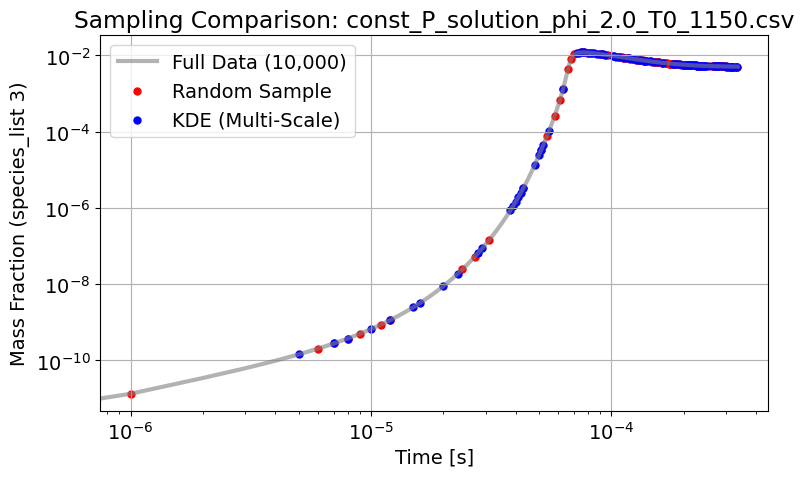

[✓] Processed const_P_solution_phi_2.0_T0_1200.csv: saved random and KDE samples.


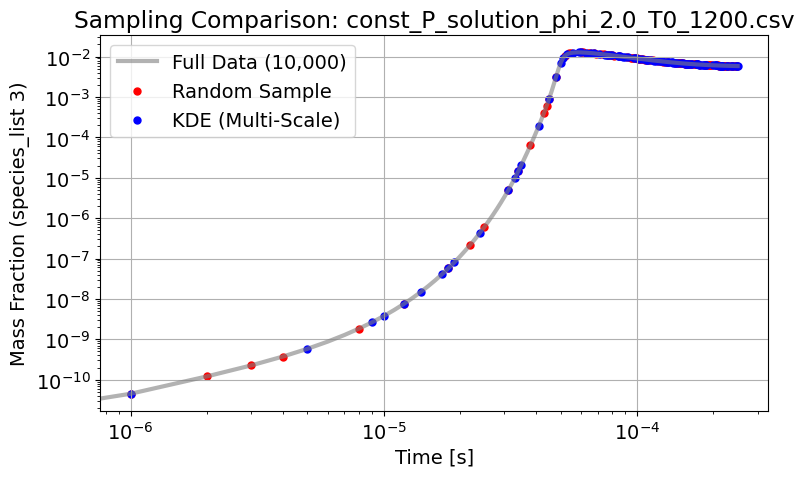

[✓] Processed const_P_solution_phi_2.0_T0_950.csv: saved random and KDE samples.


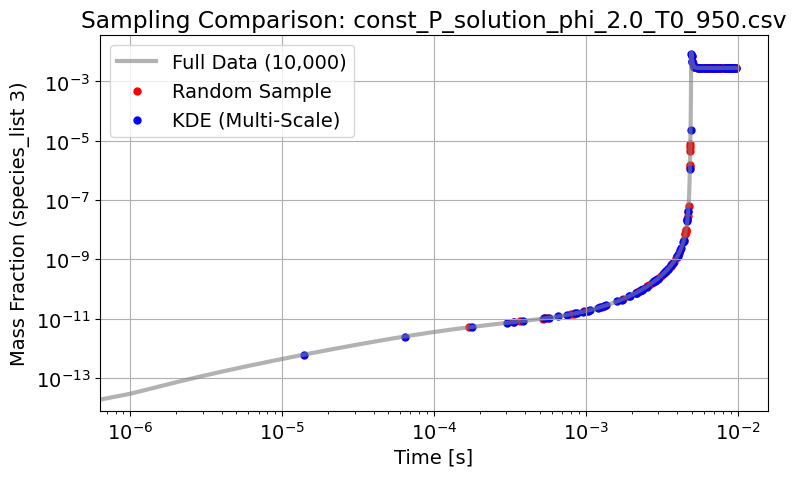

In [13]:

# === CONFIGURATION ===
INPUT_DIR = "solution_data"
OUTPUT_DIR_RANDOM = "sampled_random_50"
OUTPUT_DIR_KDE = "sampled_multiscale_50"
SOL_NUM_POINTS = 100
TEMP_COL = -1       # Last column (T)
TARGET_COL = 3      # Sampling target column (e.g., Y_OH)
TAU_R = 1e-2        # Total simulation time
N_STEPS = 10000     # Number of simulation steps originally used

species_list = ["Y_H2", "Y_H", "Y_O2", "Y_OH", "Y_O", "Y_H2O", "Y_HO2", "Y_H2O2", "Y_N2", "T"]

# === UTILITIES ===
def estimate_ignition_delay(data, time, temp_col):
    dTdt = np.gradient(data[:, temp_col], time)
    return time[np.argmax(dTdt)]

def trim_to_4tau(data, time, tau_ign):
    mask = time <= 5 * tau_ign
    return data[mask], time[mask]

def kde_sample(data, target_col, num_points=50, bandwidth=0.01):
    target = data[:, target_col].reshape(-1, 1)
    kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth).fit(target)
    probs = np.exp(kde.score_samples(target))
    weights = np.min(probs) / probs
    weights /= weights.sum()
    indices = np.random.choice(len(data), size=num_points, replace=False, p=weights)
    # Ensure index 0 is included
    if 0 not in indices:
        indices[0] = 0
    return np.sort(indices)

def random_sample(data, num_points=50):
    indices = np.random.choice(len(data), size=num_points, replace=False)
    # if indices[0]!=0:
    #     indices[0]=0
    return np.sort(indices)

def plot_sampling(file, time, full_vals, rand_idx, kde_idx):
    os.makedirs("sampled_multiscale", exist_ok=True)  # Ensure the folder exists

    plt.figure(figsize=(8, 5))
    fig_name = "sampled_multiscale/Species mass fraction_ " + file + '.png'
    plt.plot(time, full_vals, label='Full Data (10,000)', alpha=0.6, color='gray')
    plt.scatter(time[rand_idx], full_vals[rand_idx], label='Random Sample', color='red', s=25)
    plt.scatter(time[kde_idx], full_vals[kde_idx], label='KDE (Multi-Scale)', color='blue', s=25)
    plt.xlabel("Time [s]")
    plt.ylabel(f"Mass Fraction (species_list {TARGET_COL})")
    plt.title(f"Sampling Comparison: {file}")
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(fig_name, dpi=300)
    plt.show()



# === MAIN PROCESS ===
def process_file(file):
    full_path = os.path.join(INPUT_DIR, file)
    data = genfromtxt(full_path, delimiter=',')
    time = np.linspace(0, TAU_R, data.shape[0])

    try:
        tau_ign = estimate_ignition_delay(data, time, TEMP_COL)
    except:
        print(f"[!] Could not estimate ignition delay for {file}")
        return

    data_trimmed, time_trimmed = trim_to_4tau(data, time, tau_ign)
    # data_trimmed, time_trimmed = data, time

    if len(data_trimmed) < SOL_NUM_POINTS:
        print(f"[!]  {file}: too few points after trim.")
        data_trimmed, time_trimmed = data, time
        # return

    rand_idx = random_sample(data_trimmed, SOL_NUM_POINTS)
    kde_idx = kde_sample(data_trimmed, TARGET_COL, SOL_NUM_POINTS)
    
    # save_rand = [time[rand_idx], data_trimmed[rand_idx]]
    # save_kde = [time[kde_idx], data_trimmed[kde_idx]]
    
    # Concatenate vertically and transpose so each row is [time, data]
    save_rand = np.column_stack((time[rand_idx], data_trimmed[rand_idx]))
    save_kde = np.column_stack((time[kde_idx], data_trimmed[kde_idx]))  
    
    savetxt(os.path.join(OUTPUT_DIR_RANDOM, file), save_rand, delimiter=',')
    savetxt(os.path.join(OUTPUT_DIR_KDE, file), save_kde, delimiter=',')

    print(f"[✓] Processed {file}: saved random and KDE samples.")

    # Plot comparison
    plot_sampling(file, time_trimmed, data_trimmed[:, TARGET_COL], rand_idx, kde_idx)

# === RUN SCRIPT ===
def main():
    os.makedirs(OUTPUT_DIR_RANDOM, exist_ok=True)
    os.makedirs(OUTPUT_DIR_KDE, exist_ok=True)

    for fname in os.listdir(INPUT_DIR):
        if fname.endswith(".csv"):
            process_file(fname)

if __name__ == "__main__":
    main()


C:\Users\Asus\AppData\Local\Temp\ipykernel_3620\2466345690.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(1, 2, figsize=(12, 4))


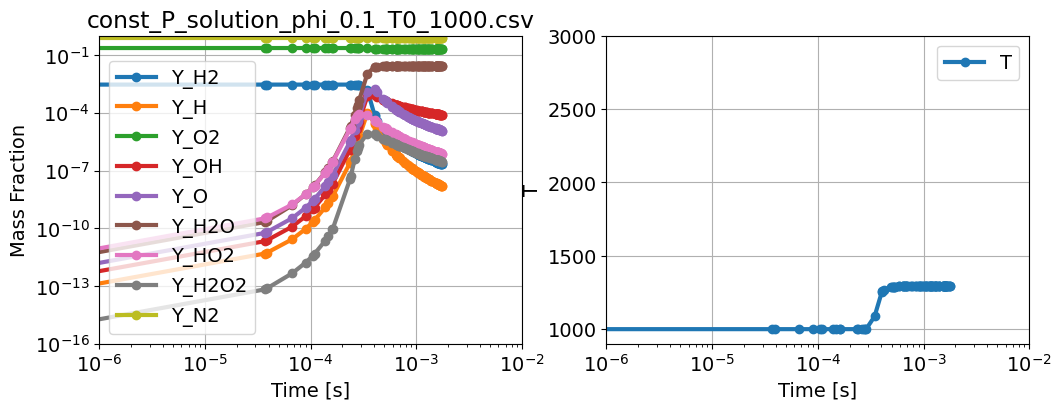

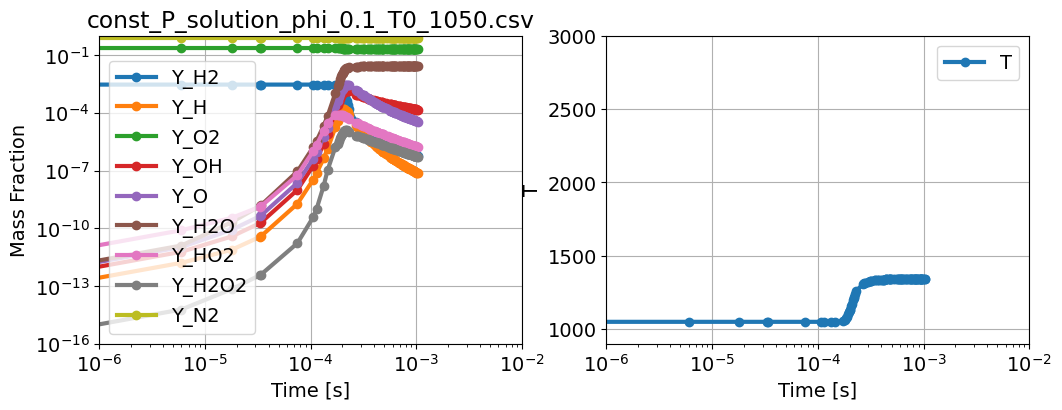

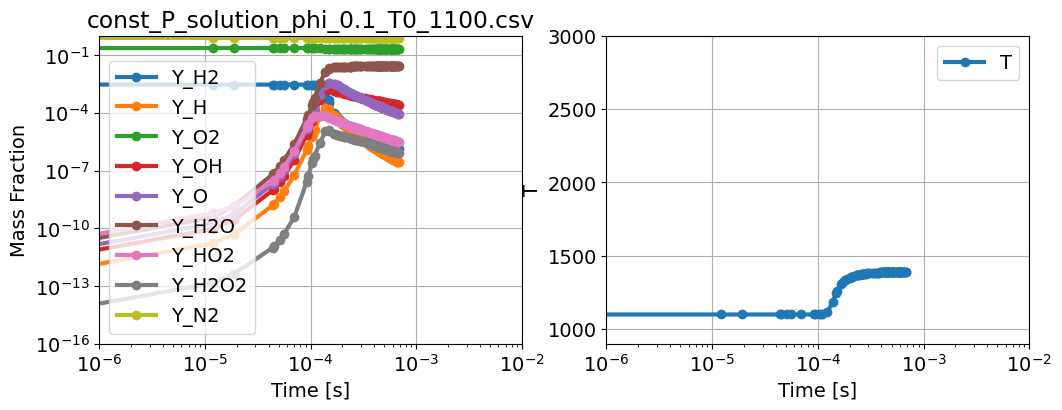

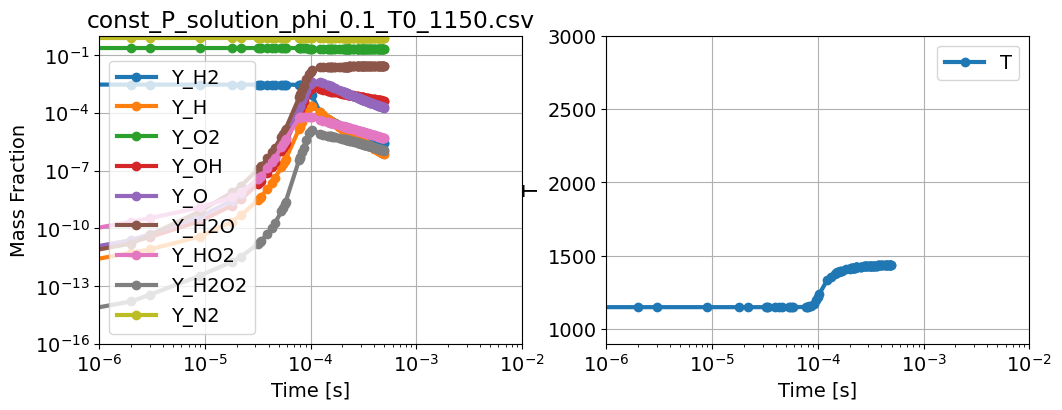

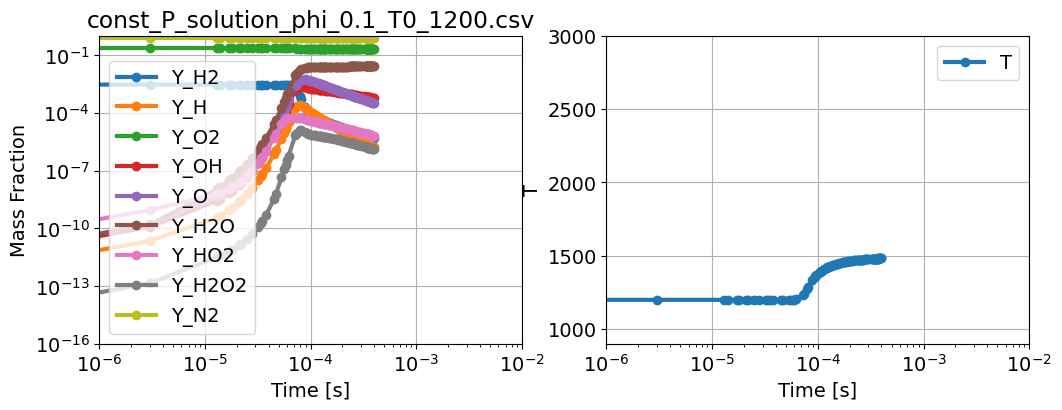

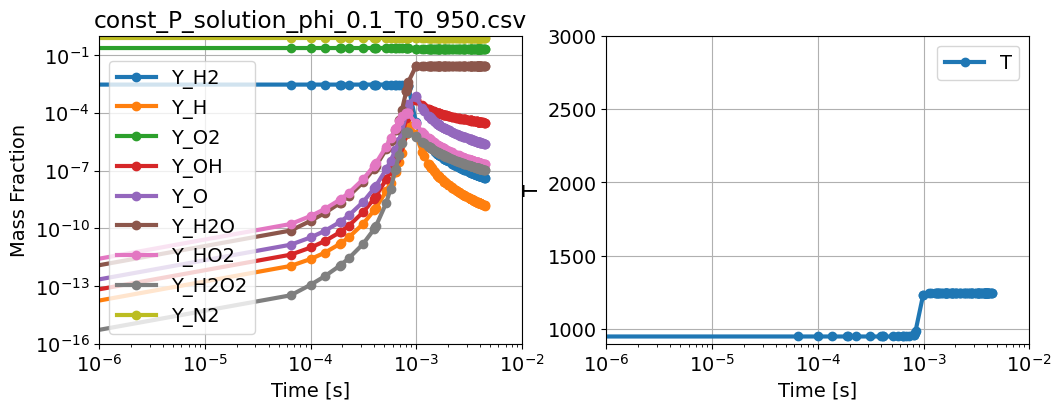

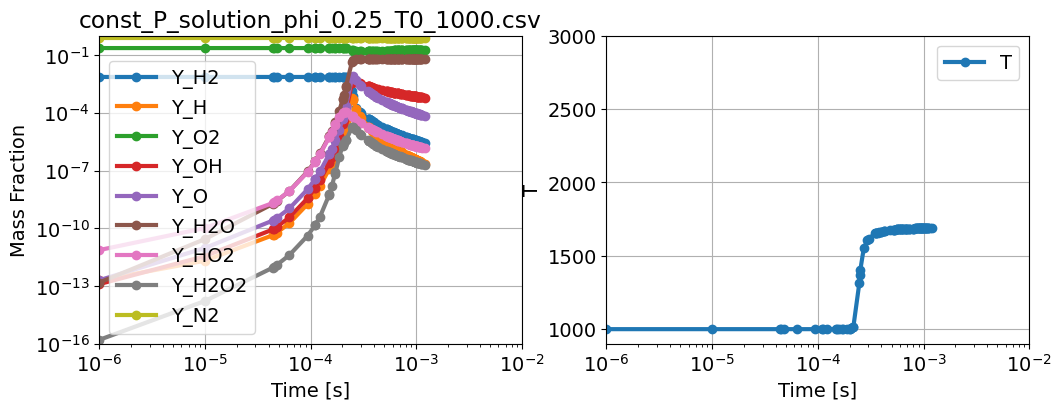

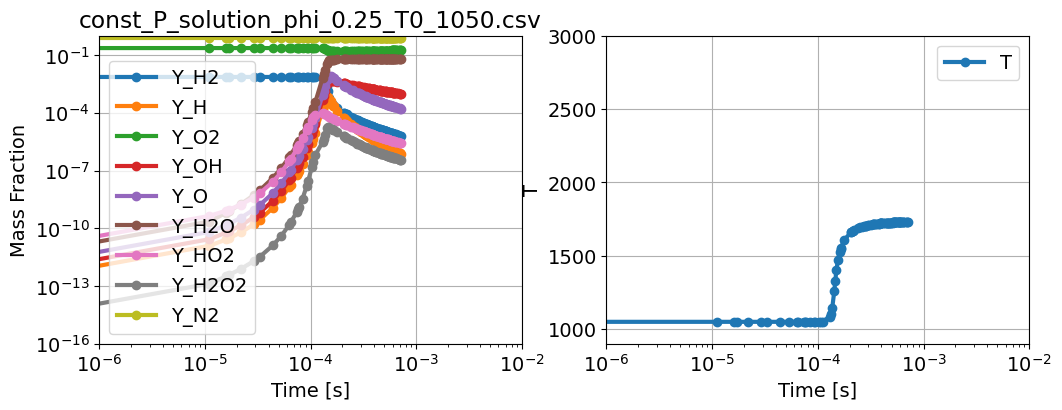

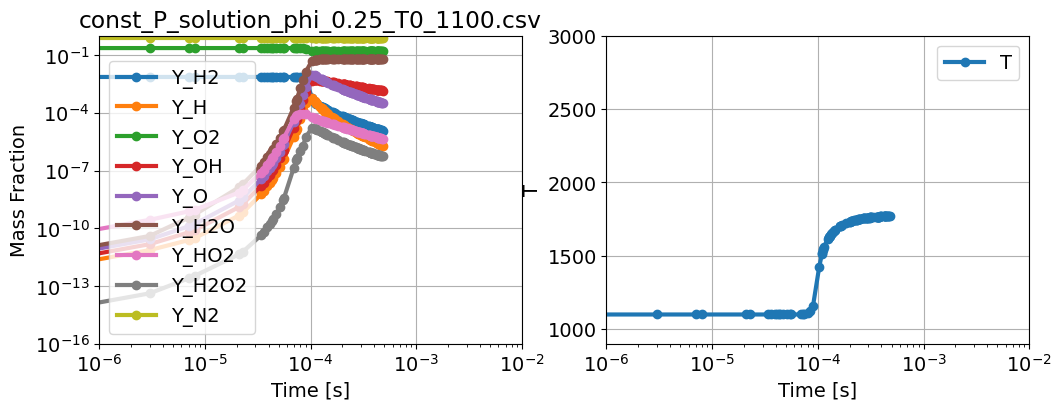

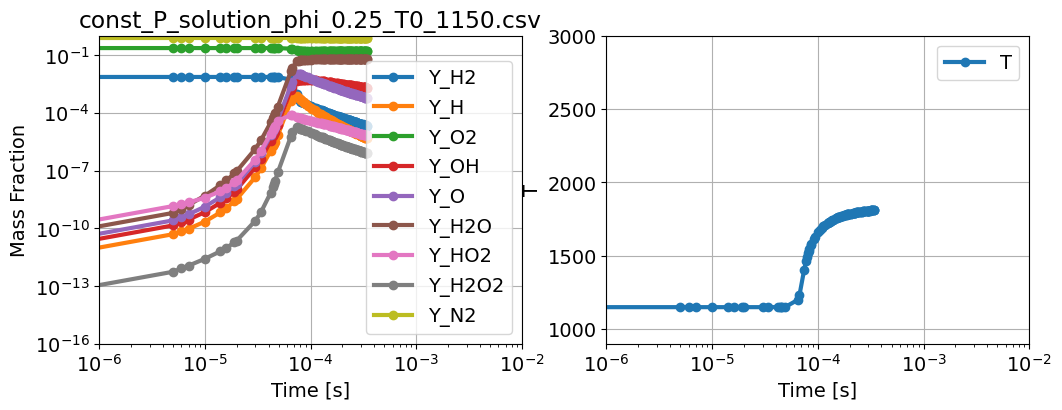

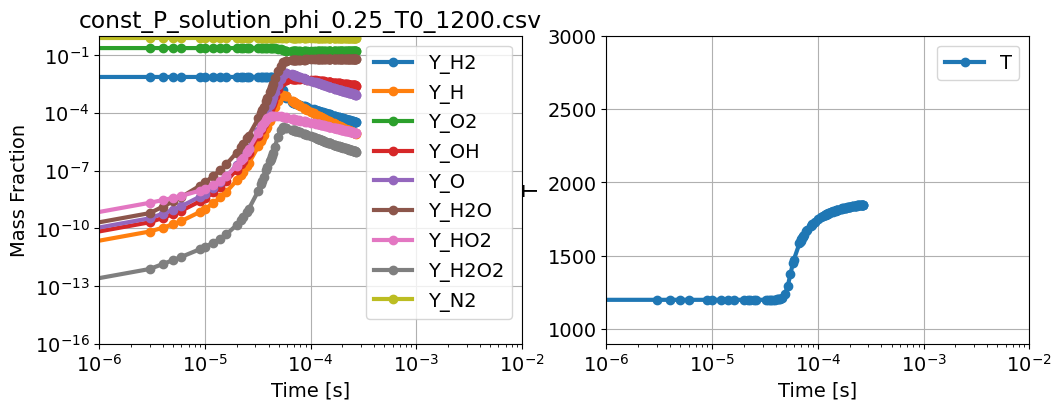

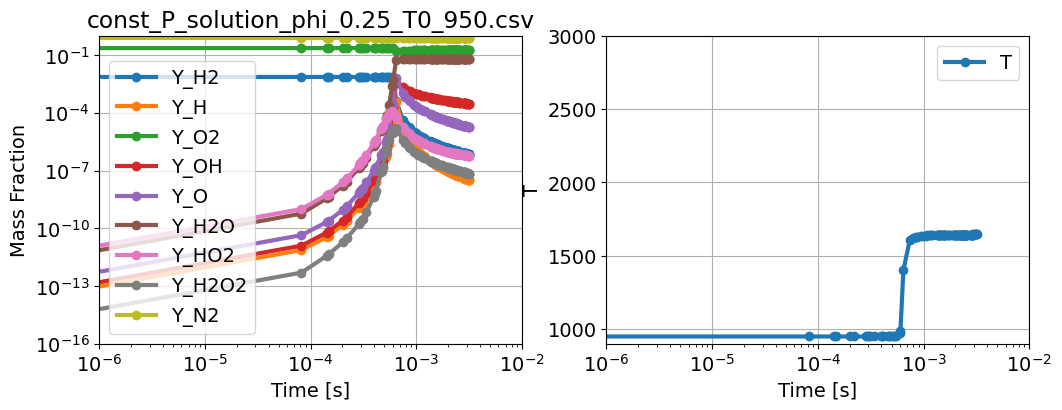

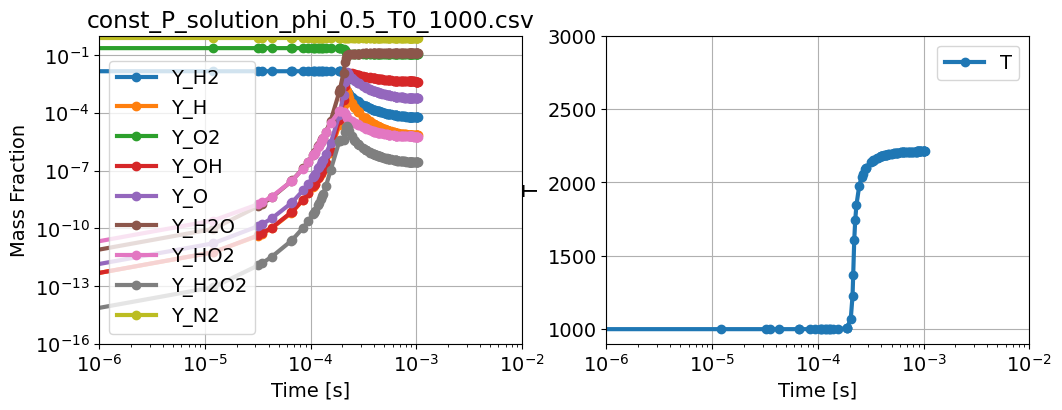

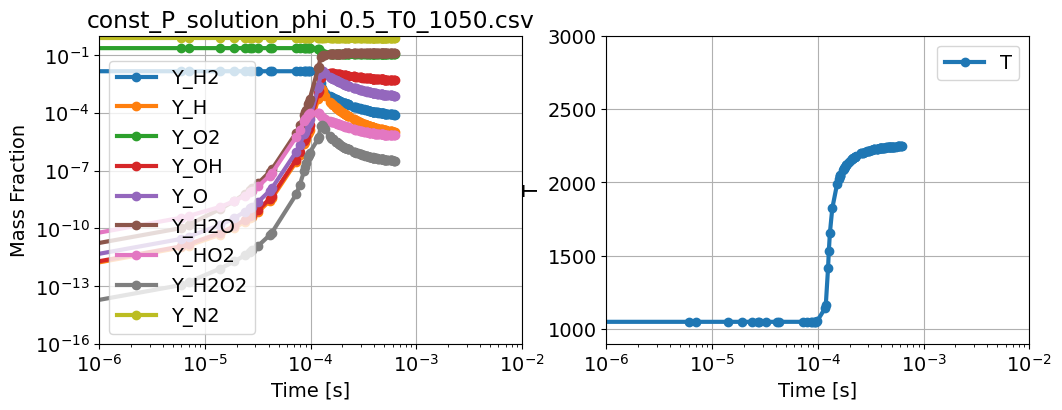

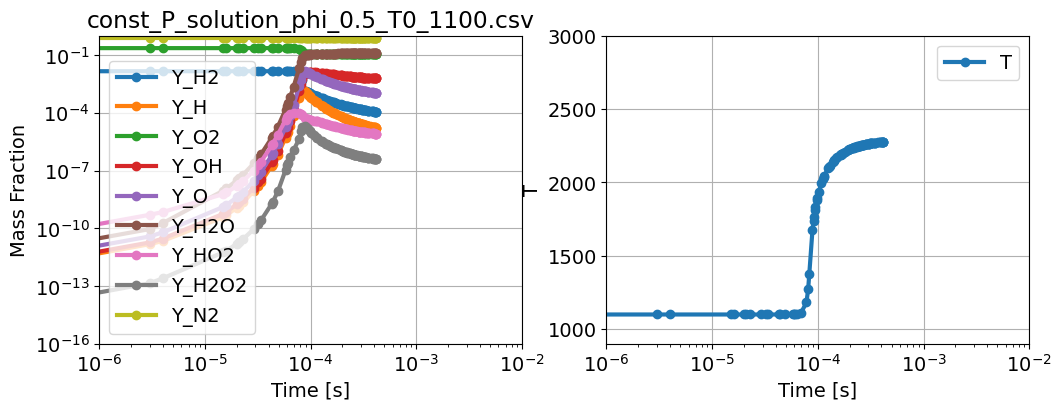

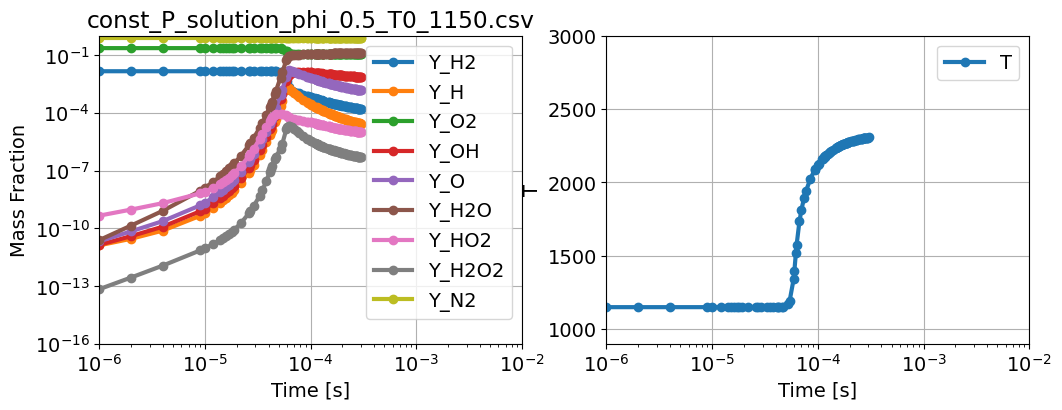

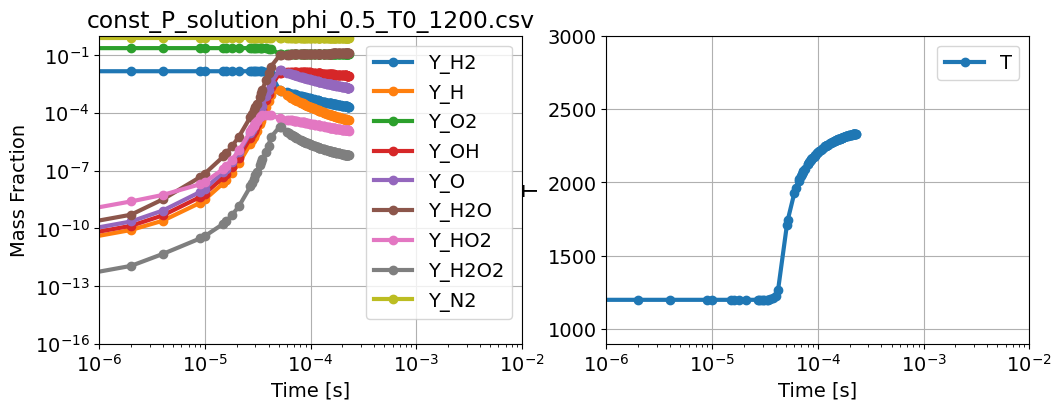

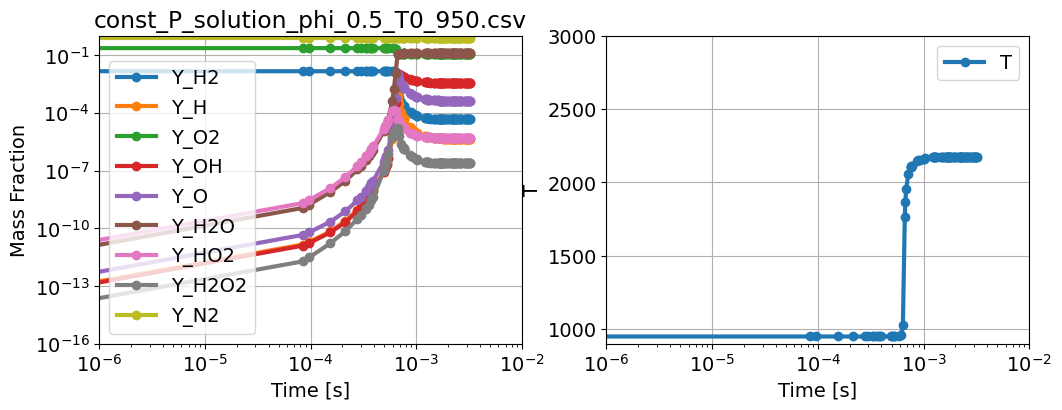

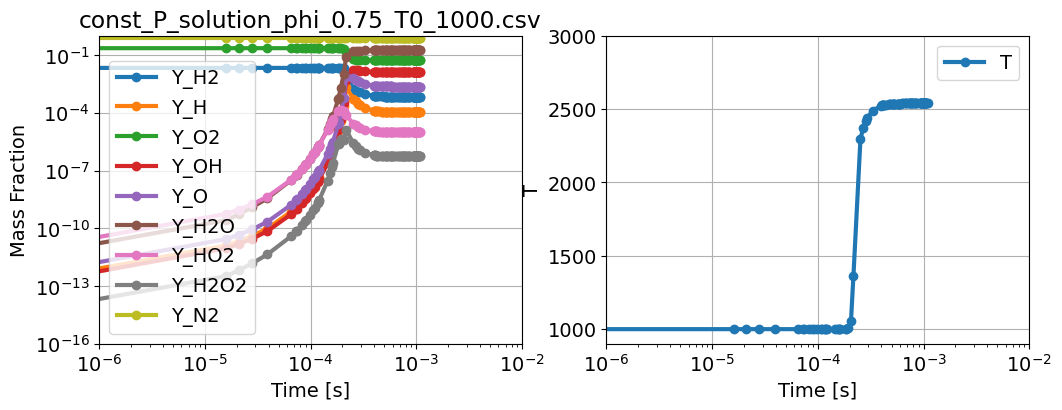

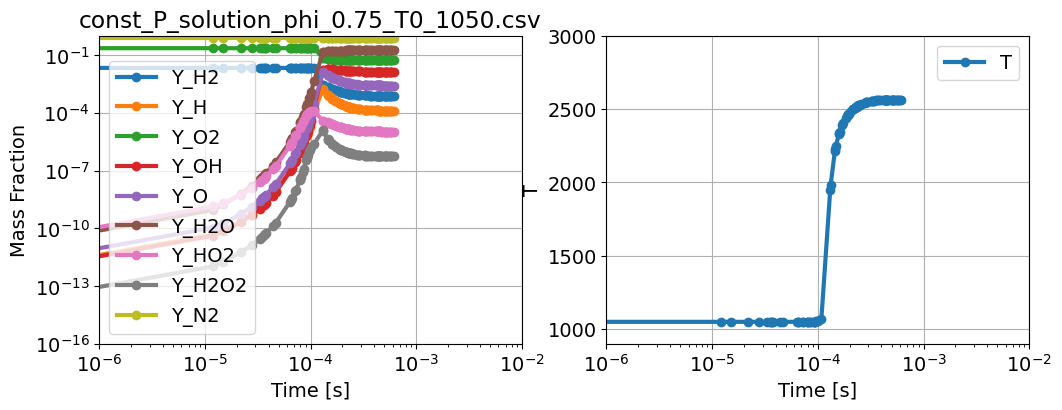

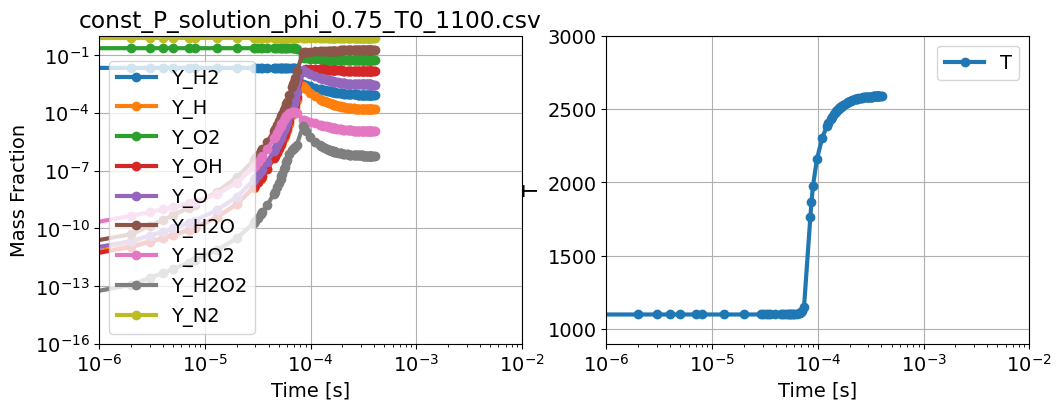

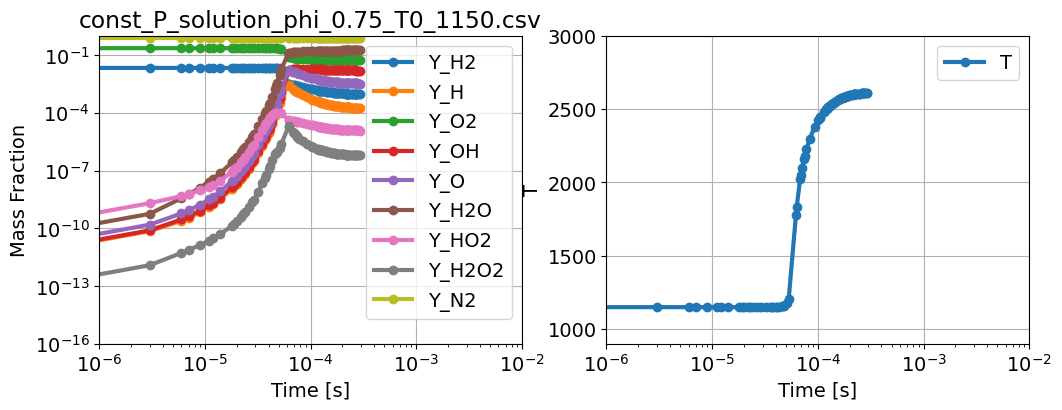

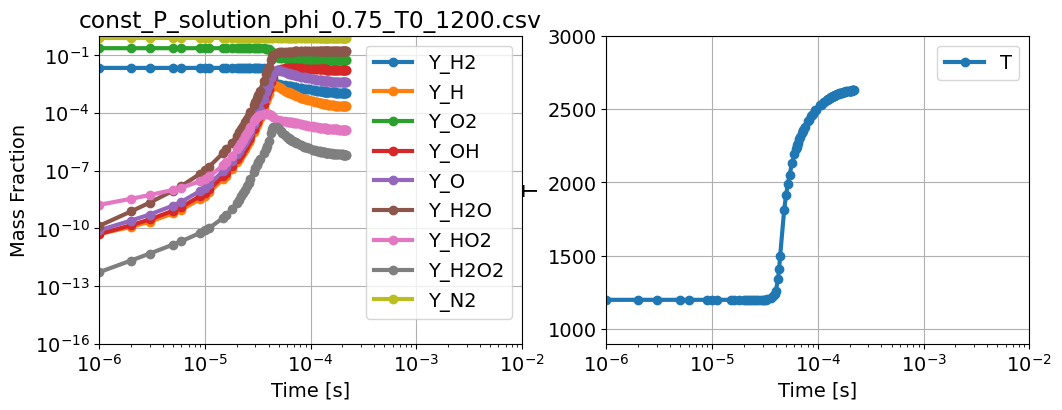

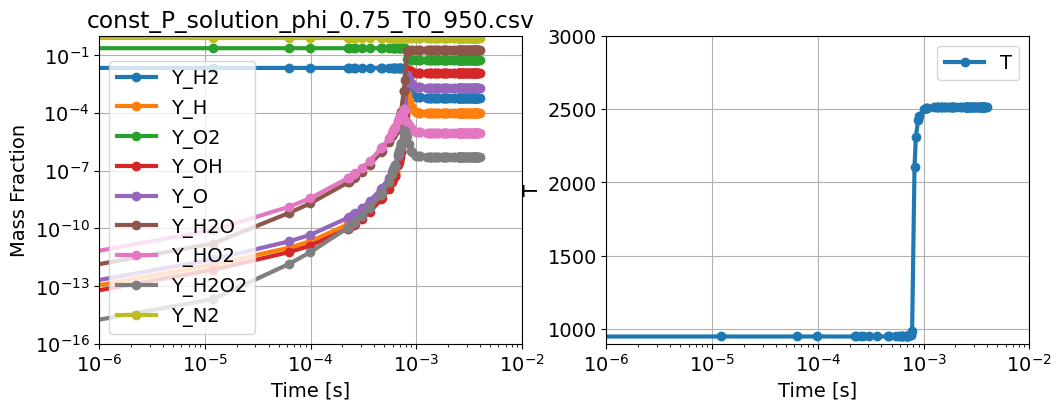

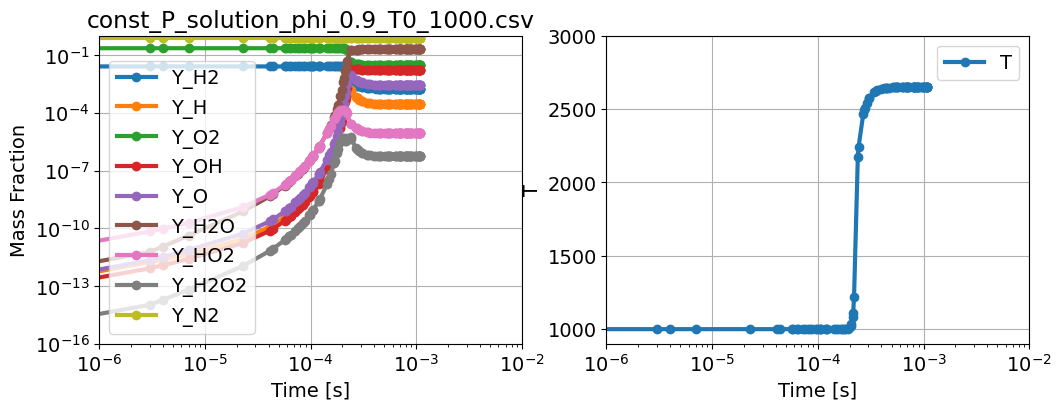

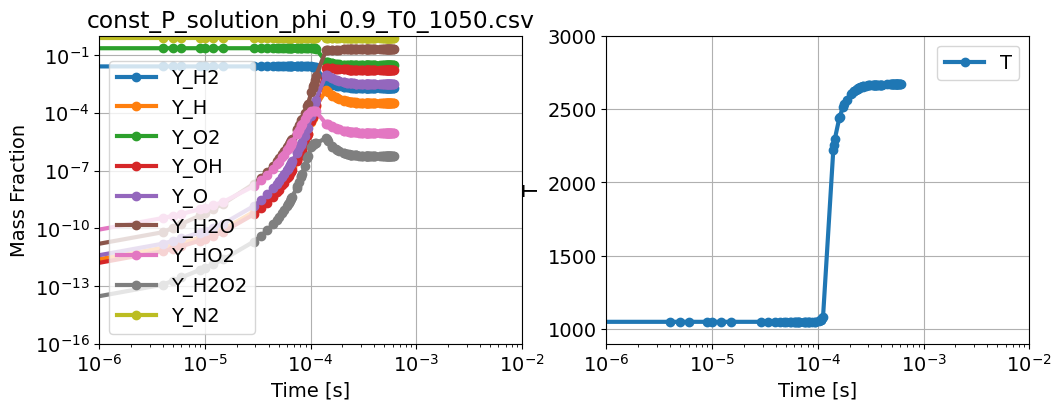

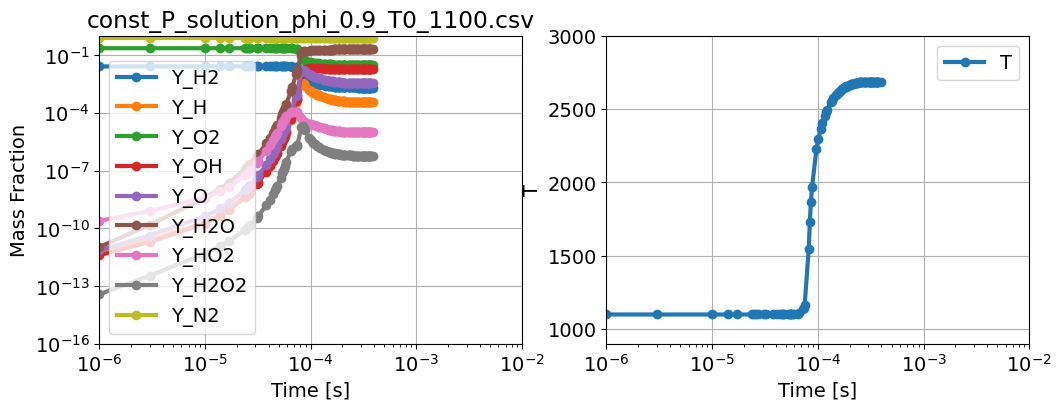

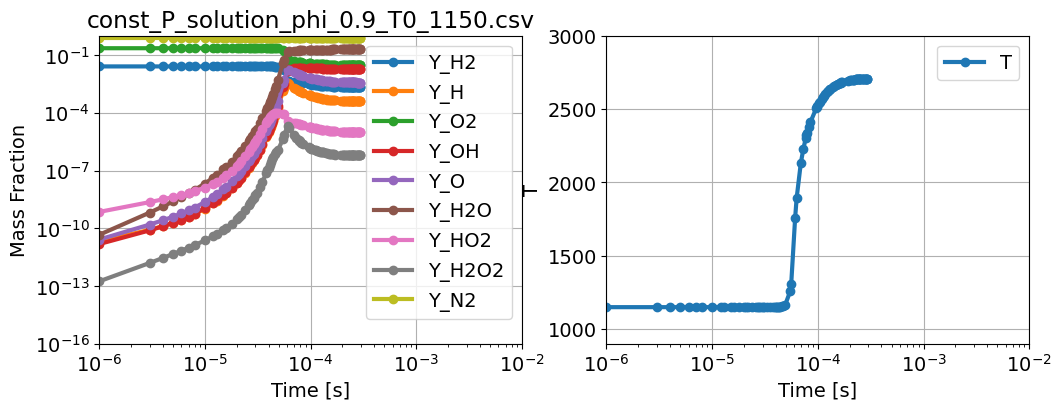

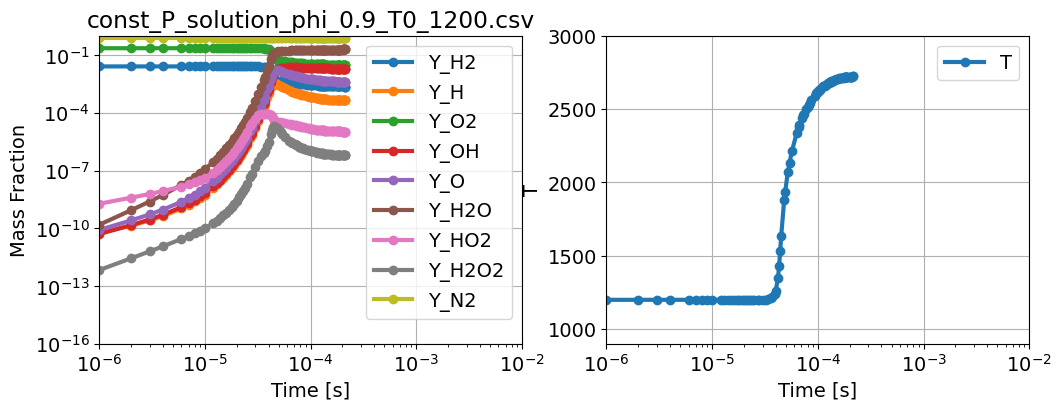

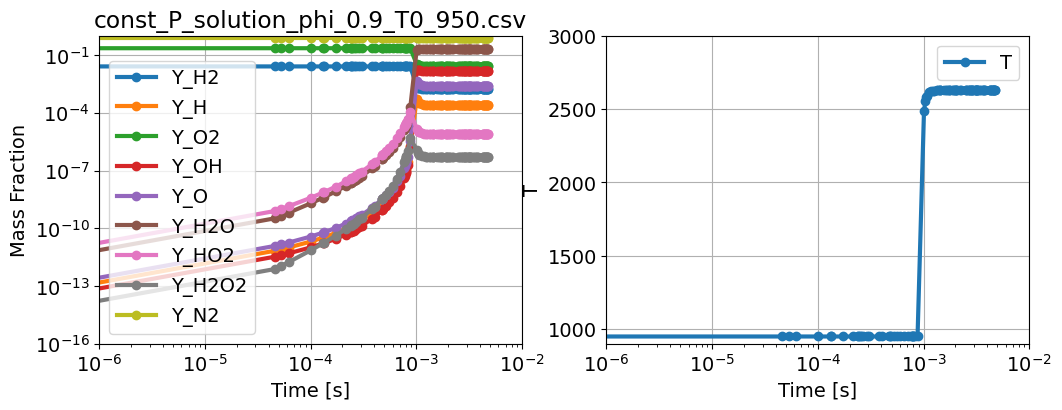

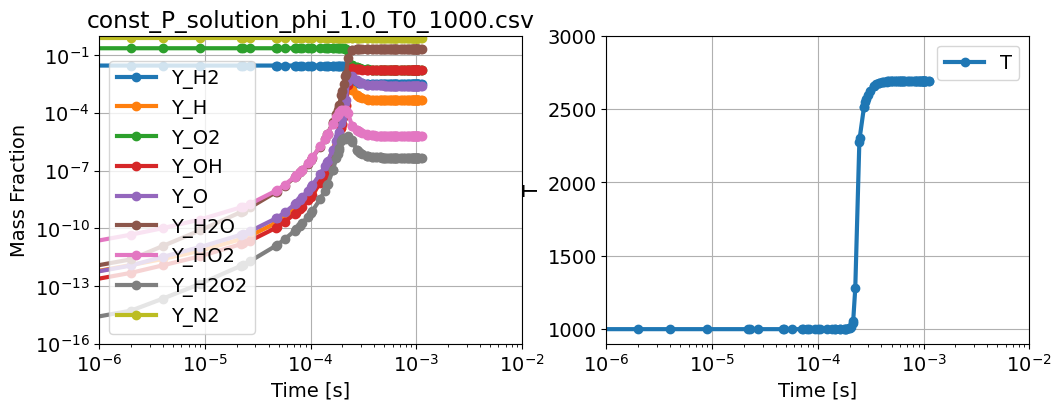

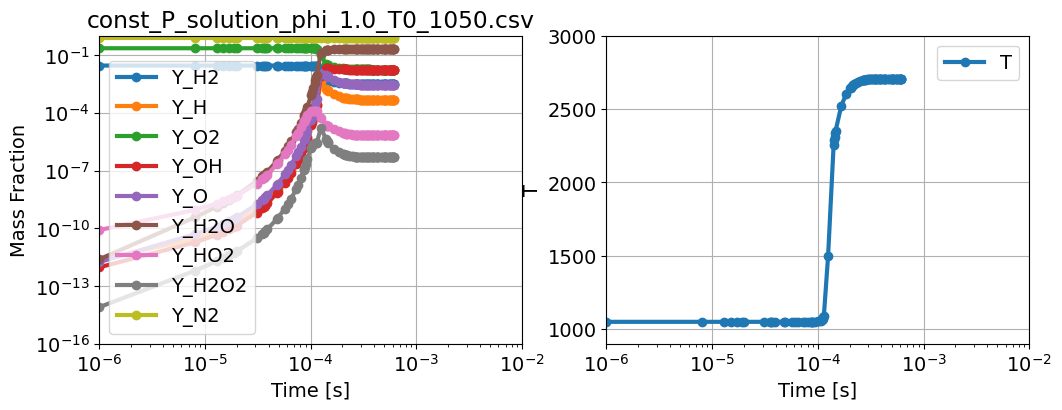

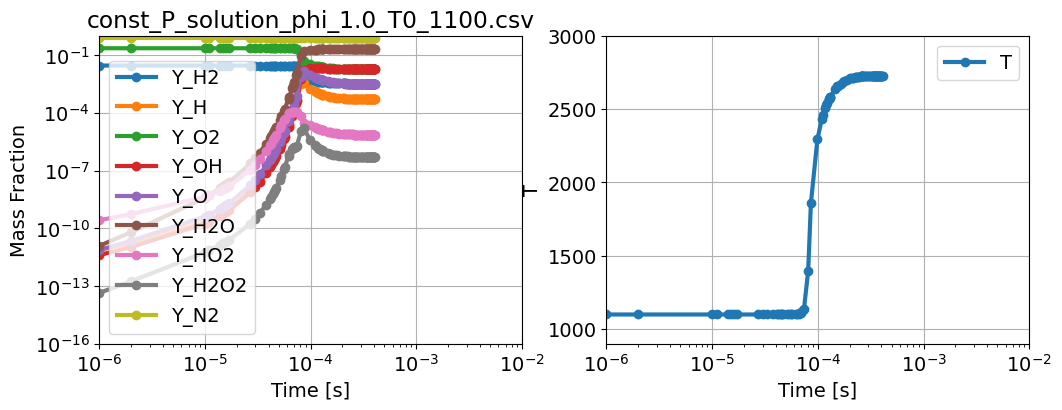

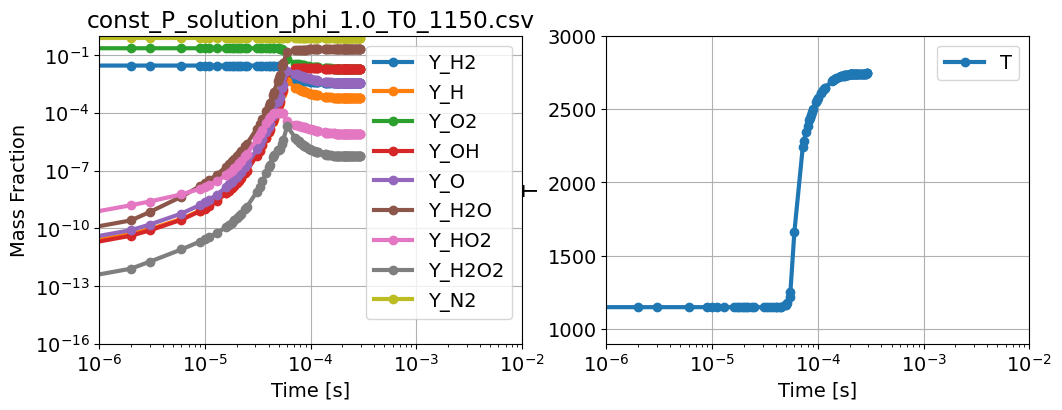

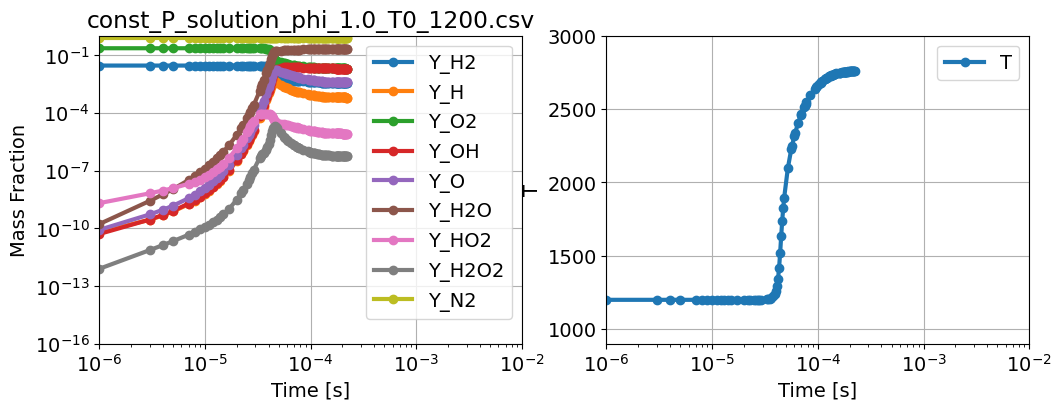

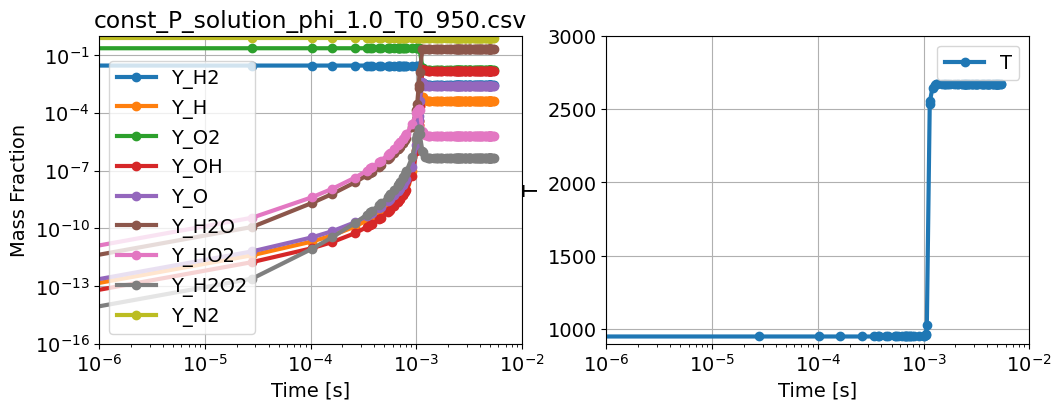

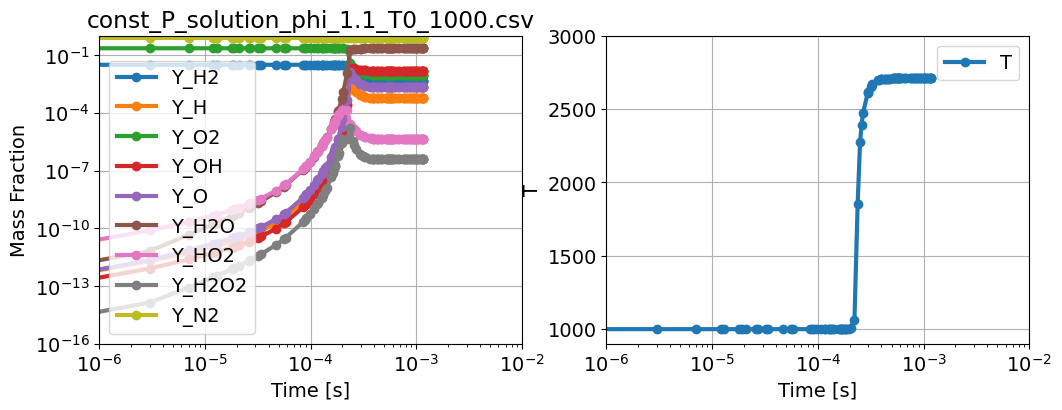

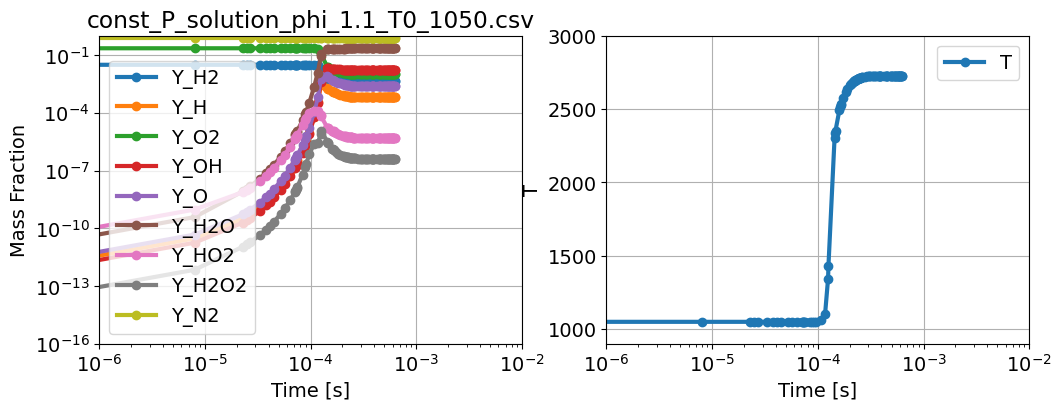

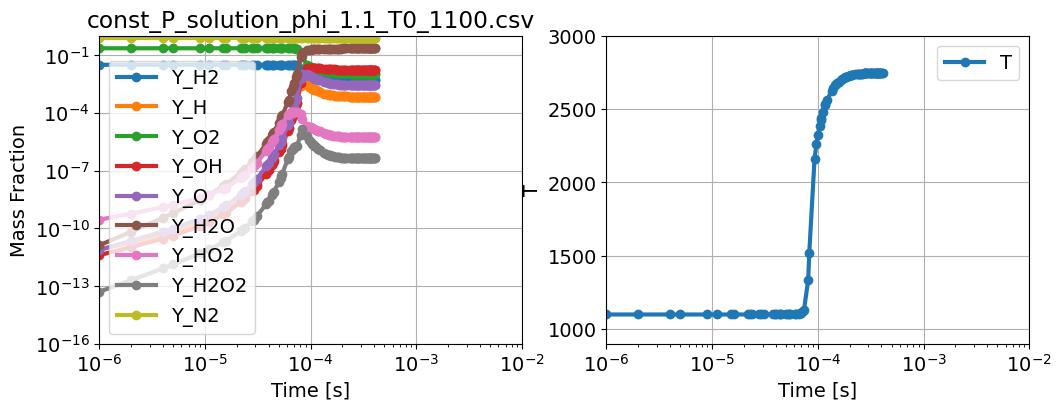

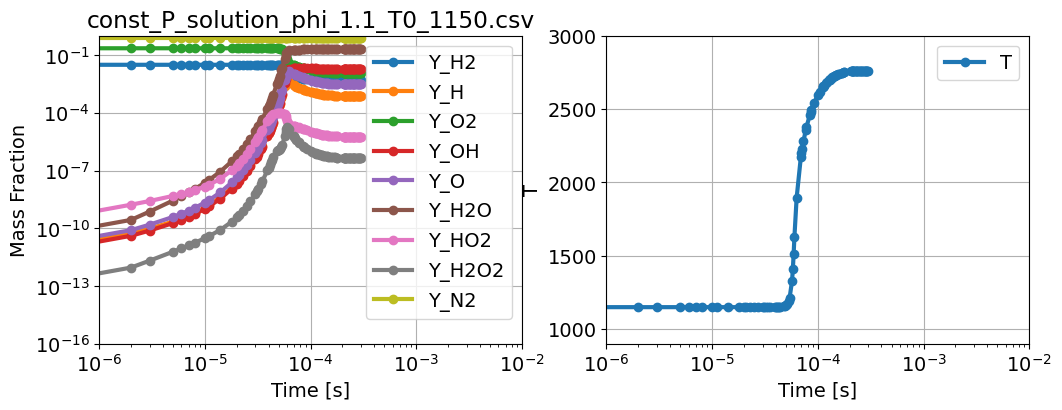

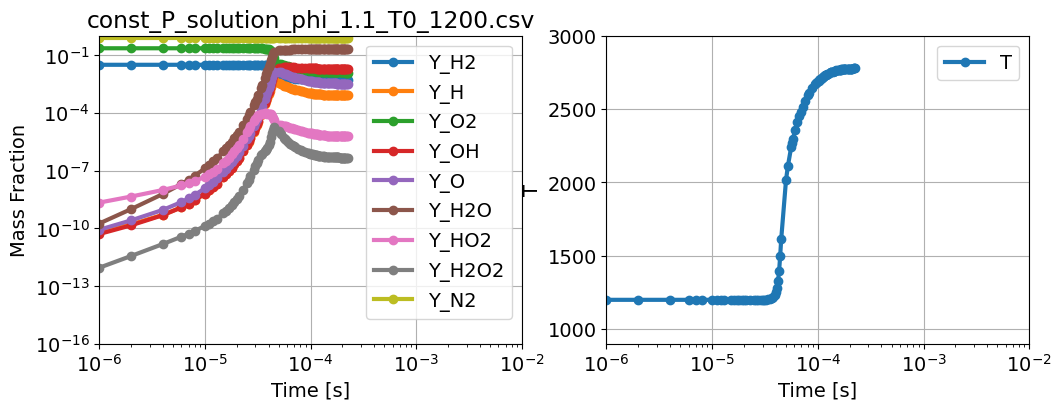

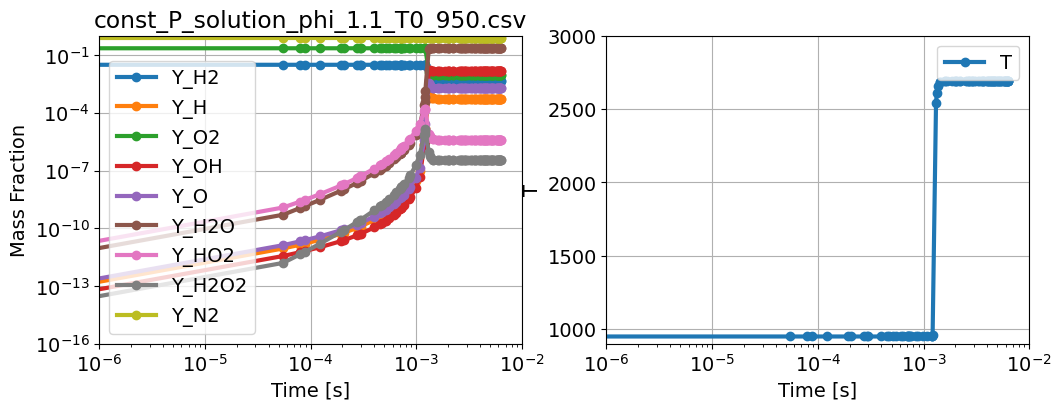

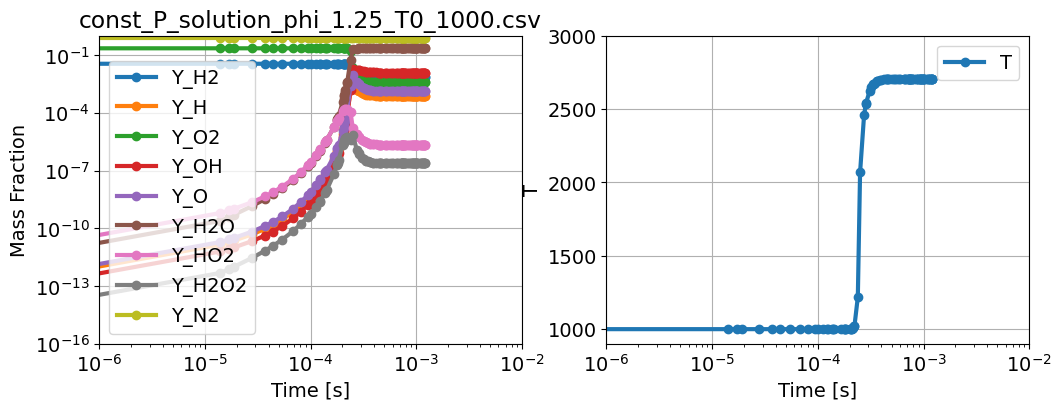

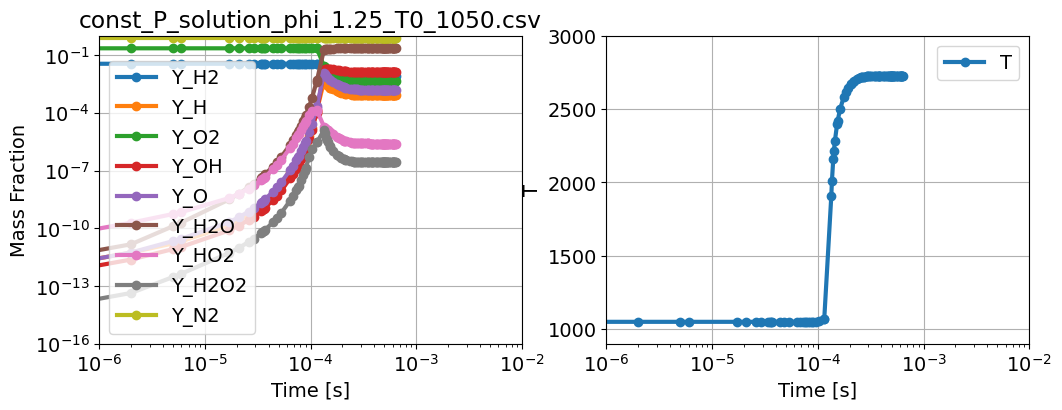

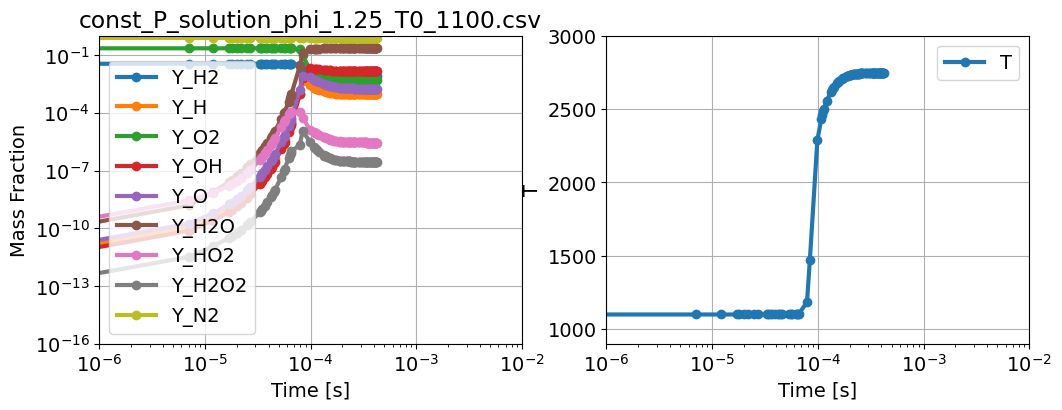

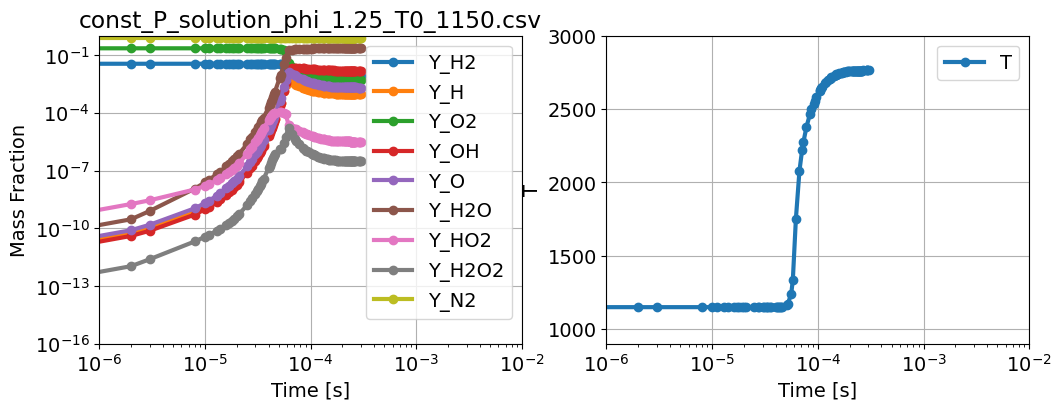

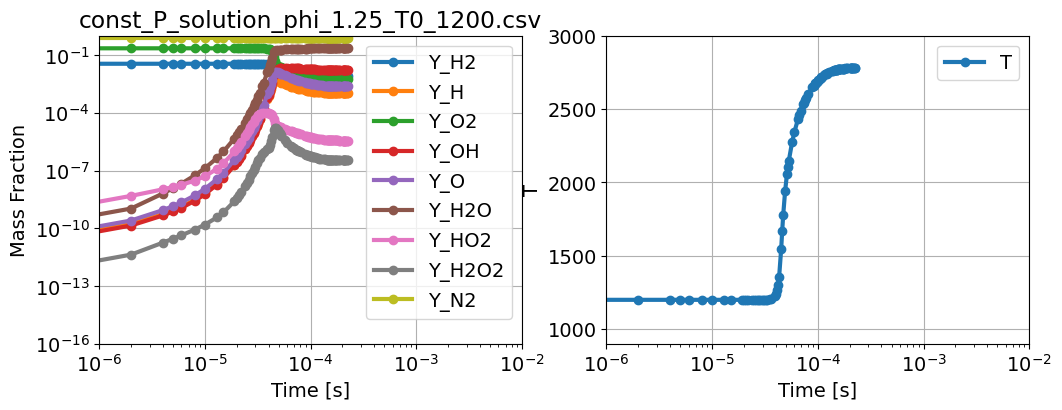

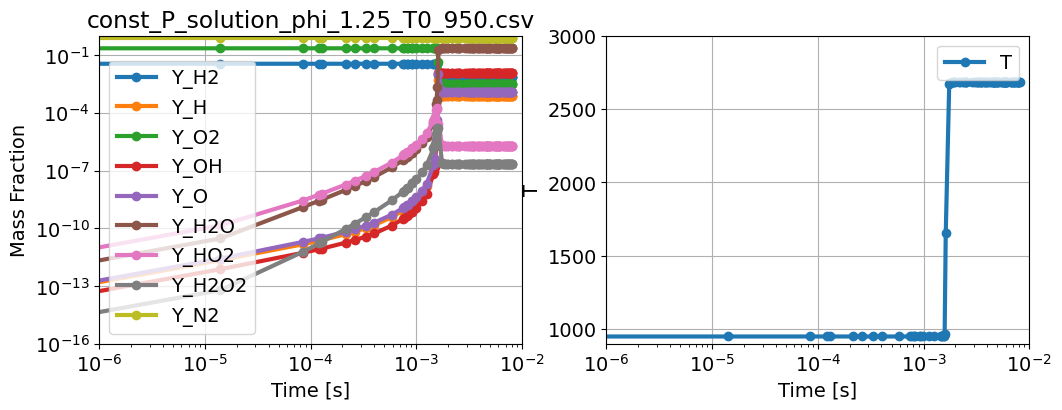

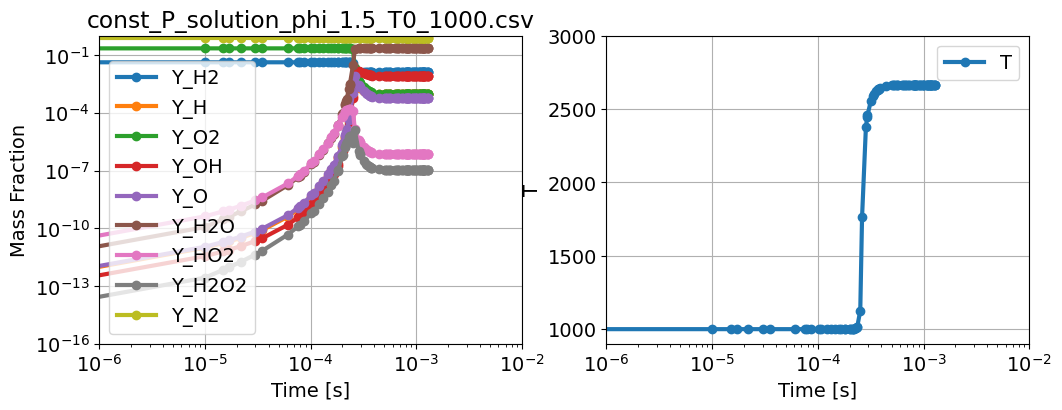

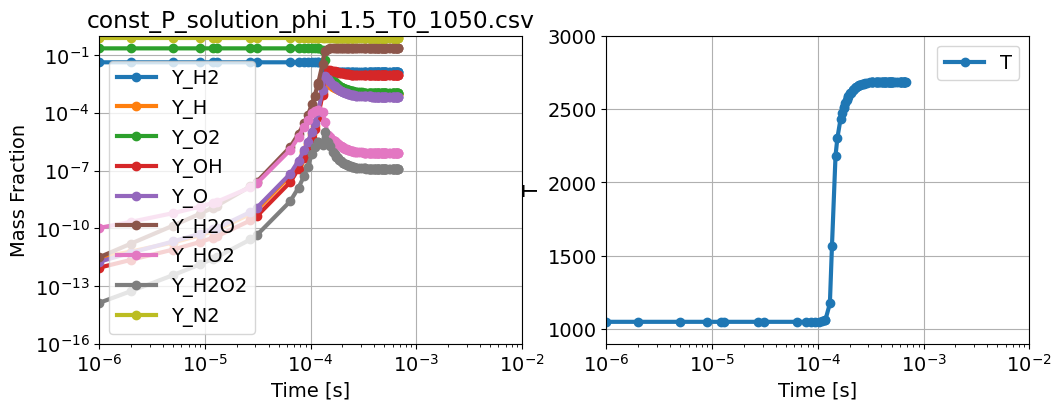

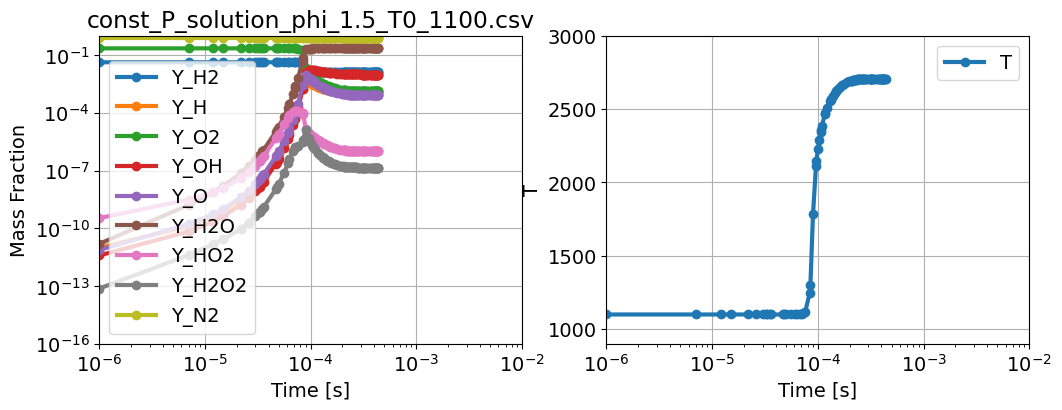

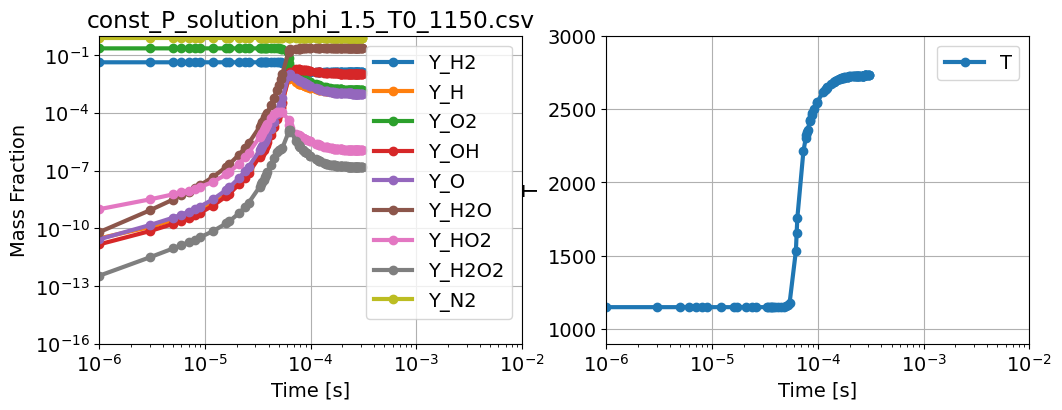

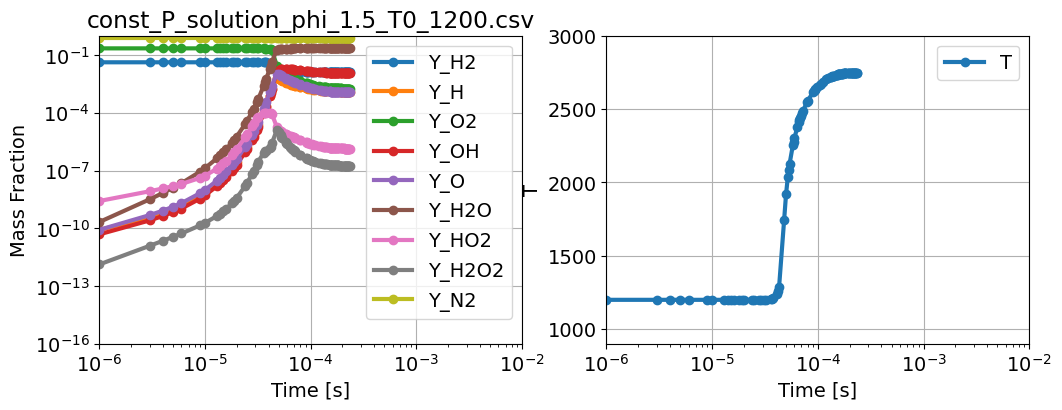

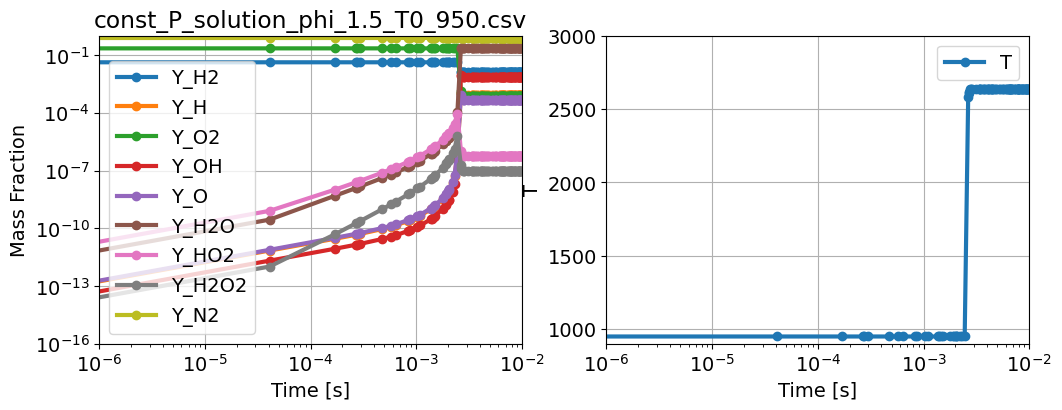

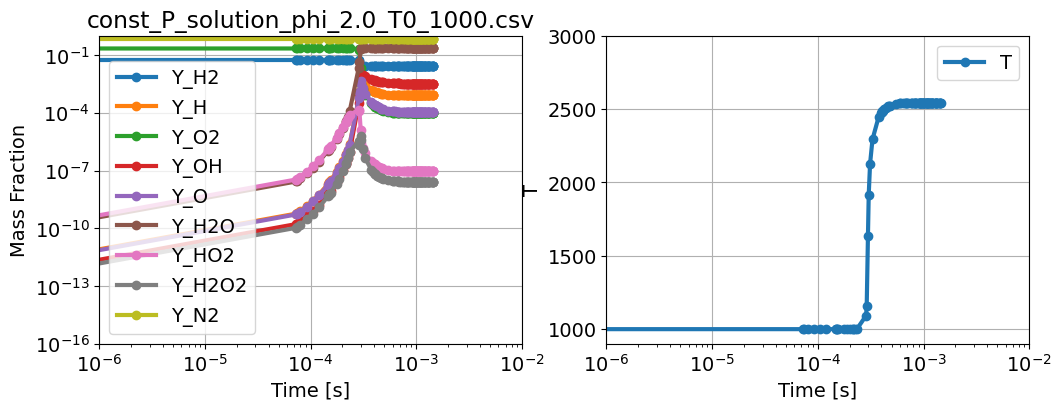

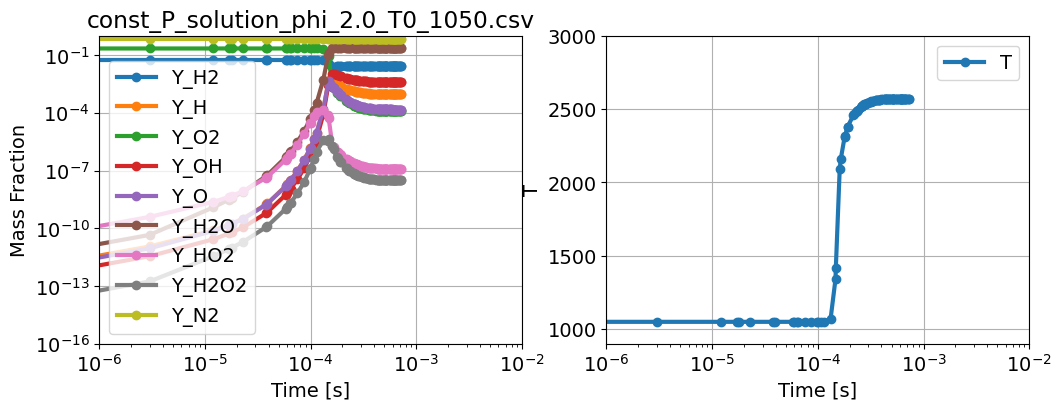

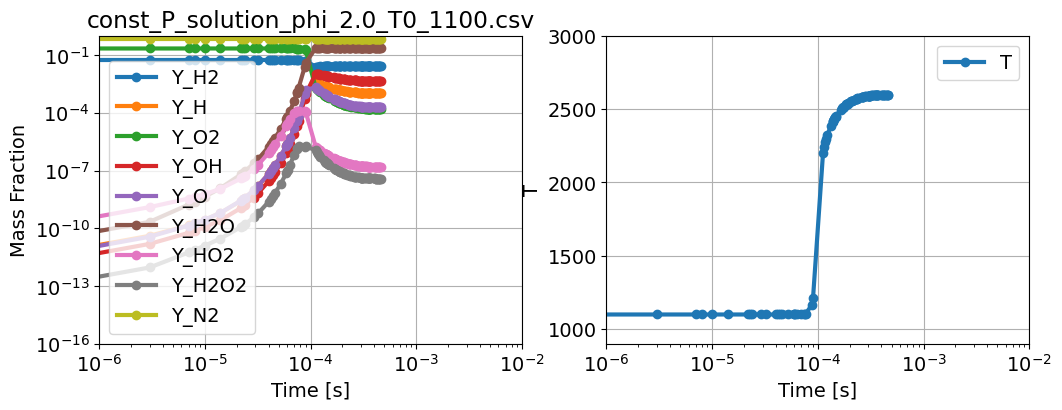

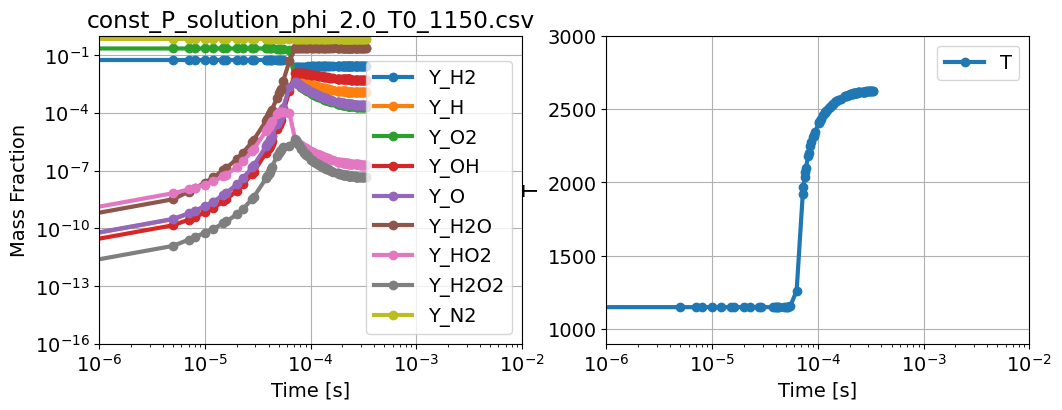

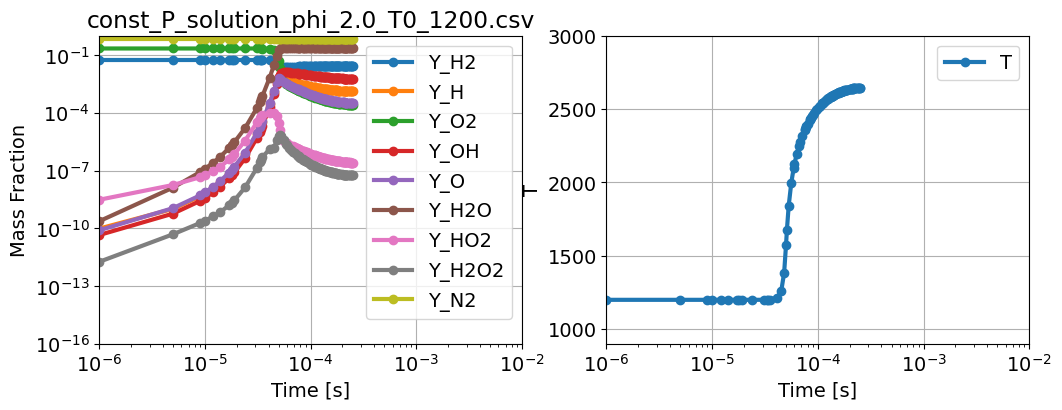

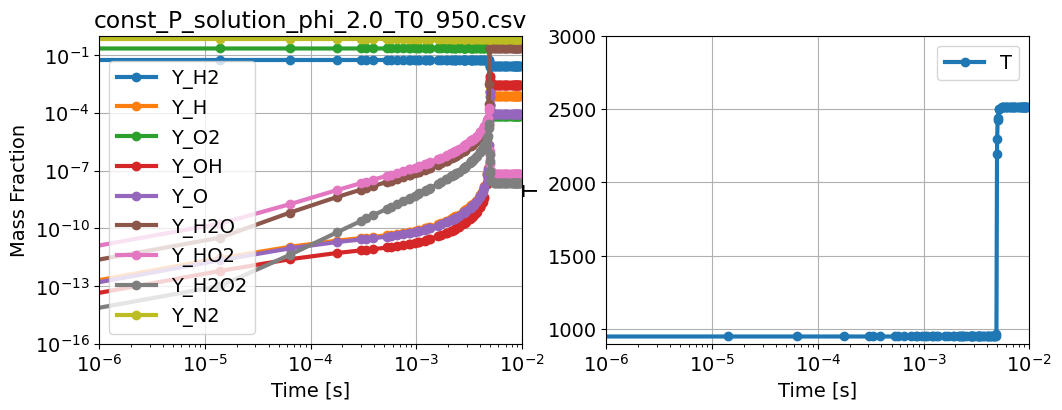

In [14]:

input_dir = "sampled_multiscale_50"

# === PLOT FUNCTION (SIDE-BY-SIDE) === #
def plot_comparison(original_data, file):

    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    # Original
    for i in range(len(species_list) - 1):  # all except temperature
        axs[0].plot(original_data[:, 0], original_data[:, i+1], 'o-',label=species_list[i])
    axs[0].set_title(file)
    axs[0].set_xlabel("Time [s]")
    axs[0].set_ylabel("Mass Fraction")
    axs[0].set_xscale('log')
    axs[0].set_yscale('log')
    axs[0].set_xlim([1e-6, 1e-2])
    axs[0].set_ylim([1e-16, 1])
    axs[0].legend(loc="best")
    axs[0].grid(True)
    
    axs[1].plot(original_data[:, 0], original_data[:, -1], 'o-',label='T')
    axs[1].set_xlabel("Time [s]")
    axs[1].set_ylabel("T")
    axs[1].set_xscale('log')
    axs[1].set_xlim([1e-6, 1e-2])
    axs[1].set_ylim([900, 3000])
    axs[1].legend(loc="best")
    axs[1].grid(True)


# === MAIN LOOP === #
for file in os.listdir(input_dir):
    if file.endswith(".csv"):
        raw_path = os.path.join(input_dir, file)

        original = genfromtxt(raw_path, delimiter=',')

        plot_comparison(original, file)
    
